## Importations

In [1]:
## plots
import matplotlib.pyplot as plt
from matplotlib import rc

##
import seaborn as sns
import numpy as np
import pandas as pd

import sys
sys.path.append('../')

## ML :
from scripts.machine_learning_utils import *
from scripts.models import *
from scripts.descriptors import *

rc('font', family='sans-serif', size = 7)
rc('figure', dpi= 700)
rc(('xtick', 'ytick'), labelsize = 7)
rc('legend', fontsize=6)
rc('lines', linewidth = 1)
rc('axes', linewidth = 0.5, labelsize =8)
rc('legend', handlelength = 2)


Skipped loading some PyTorch models, missing a dependency. No module named 'torch'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'torch'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


## Get data

In [2]:
df_total = pd.read_csv('../tables/data/df_total.csv').set_index('SMILES')

df_OCO = df_total[df_total.group == 'OCO']
df_ONO = df_total[df_total.group == 'ONO']
df_NNN = df_total[df_total.group == 'NNN']
df_triarylboranes = df_total[df_total.group == "triarylboranes"]

## Interprete coefficients of ridge model

only on the ONO, triaryl and NNN molecular structures

In [3]:
names = get_names('hammett')

In [4]:
X_ONO = create_descriptors(df_ONO.index, "hammett", structure = 'ONO')
df_X_ONO = pd.DataFrame(X_ONO)
df_X_ONO.columns = names
df_X_ONO['FIA']= list(df_ONO.FIA)

In [5]:
X_NNN = create_descriptors(df_NNN.index, "hammett", structure = 'NNN')
df_X_NNN = pd.DataFrame(X_NNN)
df_X_NNN.columns = names
df_X_NNN['FIA']= list(df_NNN.FIA)

X_triarylboranes = create_descriptors(df_triarylboranes.index, "hammett", structure = 'triarylboranes')
df_X_triarylboranes = pd.DataFrame(X_triarylboranes)
df_X_triarylboranes.columns = names
df_X_triarylboranes['FIA']= list(df_triarylboranes.FIA)

##### Correlation with FIA

In [6]:
df_correlation = pd.DataFrame()
df_correlation['features']= names
L_ONO=list(df_X_ONO.corr("pearson")['FIA'].drop('FIA'))
df_correlation['ONO']= [abs(x) for x in L_ONO]
L_NNN=list(df_X_NNN.corr("pearson")['FIA'].drop('FIA'))
df_correlation['NNN']= [abs(x) for x in L_NNN]
L_triarylboranes=list(df_X_triarylboranes.corr("pearson")['FIA'].drop('FIA'))
df_correlation['triarylboranes']= [abs(x) for x in L_triarylboranes]
df_correlation = df_correlation.set_index('features')
df_correlation

,ONO,NNN,triarylboranes
features,,,
"B1,o",0.190670,0.164120,0.053167
"B5,o",0.100239,0.003467,0.239696
Lo,0.295970,0.126177,0.090705
"vCOH,o",0.195284,0.181435,0.216325
"ICOH,o",0.140172,0.346594,0.174475
"vC=O,o",0.353265,0.513425,0.150146
"IC=O,o",0.240323,0.441996,0.202449
"NBOC,o",0.181589,0.250209,0.149227
"NBO=O,o",0.475240,0.555863,0.137832


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5]),
 [Text(0, 0.5, 'B1,o'),
  Text(0, 1.5, 'B5,o'),
  Text(0, 2.5, 'Lo'),
  Text(0, 3.5, 'vCOH,o'),
  Text(0, 4.5, 'ICOH,o'),
  Text(0, 5.5, 'vC=O,o'),
  Text(0, 6.5, 'IC=O,o'),
  Text(0, 7.5, 'NBOC,o'),
  Text(0, 8.5, 'NBO=O,o'),
  Text(0, 9.5, 'NBOO,o '),
  Text(0, 10.5, 'NBOH,o'),
  Text(0, 11.5, 'θtor'),
  Text(0, 12.5, 'B1,m'),
  Text(0, 13.5, 'B5,m'),
  Text(0, 14.5, 'Lm'),
  Text(0, 15.5, 'σm'),
  Text(0, 16.5, 'vCOH,m'),
  Text(0, 17.5, 'ICOH,m'),
  Text(0, 18.5, 'vC=O,m'),
  Text(0, 19.5, 'IC=O,m'),
  Text(0, 20.5, 'NBOC,m'),
  Text(0, 21.5, 'NBO=O,m'),
  Text(0, 22.5, 'NBOO,m '),
  Text(0, 23.5, 'NBOH,m'),
  Text(0, 24.5, 'B1,p'),
  Text(0, 25.5, 'B5,p'),
  Text(0, 26.5, 'Lp'),
  Text(0, 27.5, 'σp'),
  Text(0, 28.5, 'vCOH,p'),
  Text(

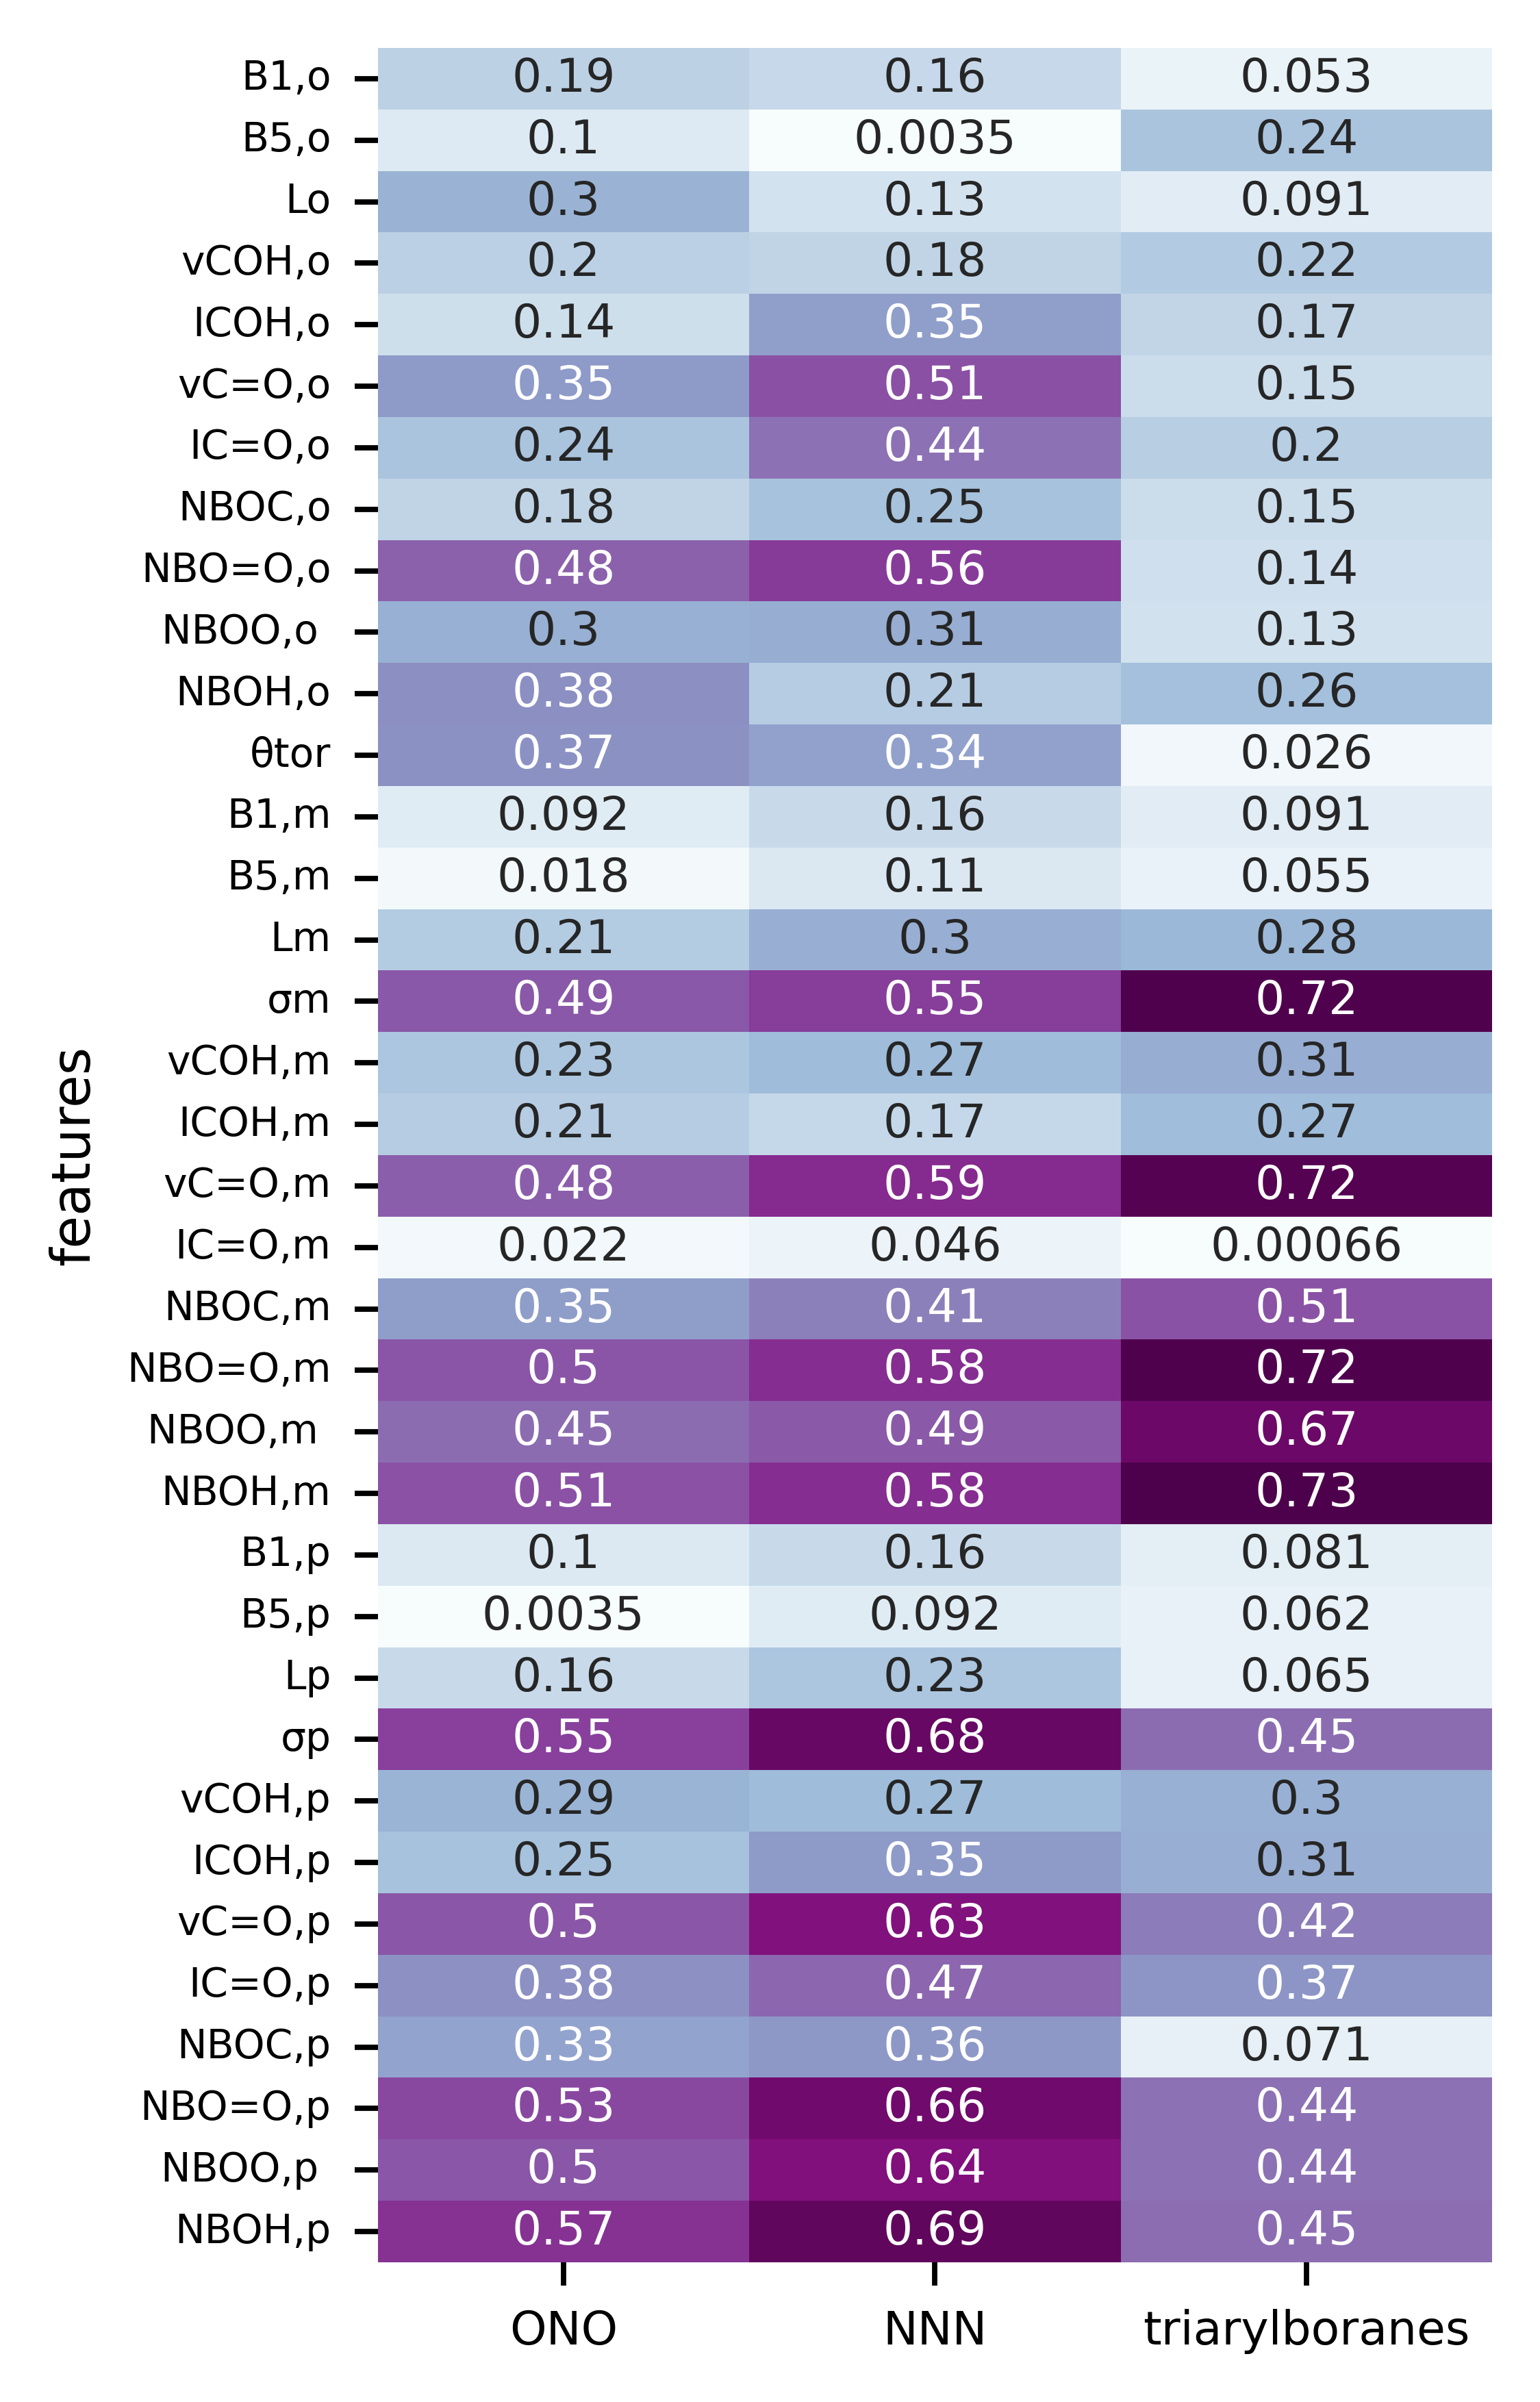

In [7]:
fig, ax = plt.subplots(figsize = (3,6))

heatmap = sns.heatmap(df_correlation, annot = True, cmap = 'BuPu', cbar = False)
rc('font', family='sans-serif', size = 5)
plt.yticks(size = 6)




#### Select uncorrelated features

In [9]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr
import seaborn as sns

In [10]:
df_X_ONO = df_X_ONO.drop('FIA', axis =1)
df_X_ONO.columns = names

In [11]:
df_X_triarylboranes = df_X_triarylboranes.drop('FIA', axis =1)
df_X_triarylboranes.columns = names

In [12]:
corr_sp = df_X_ONO.corr('spearman') #matrice de correlation

distance_sp = 1 - abs(corr_sp) #matrice de distance

Text(0.0, 1.0, 'C.')

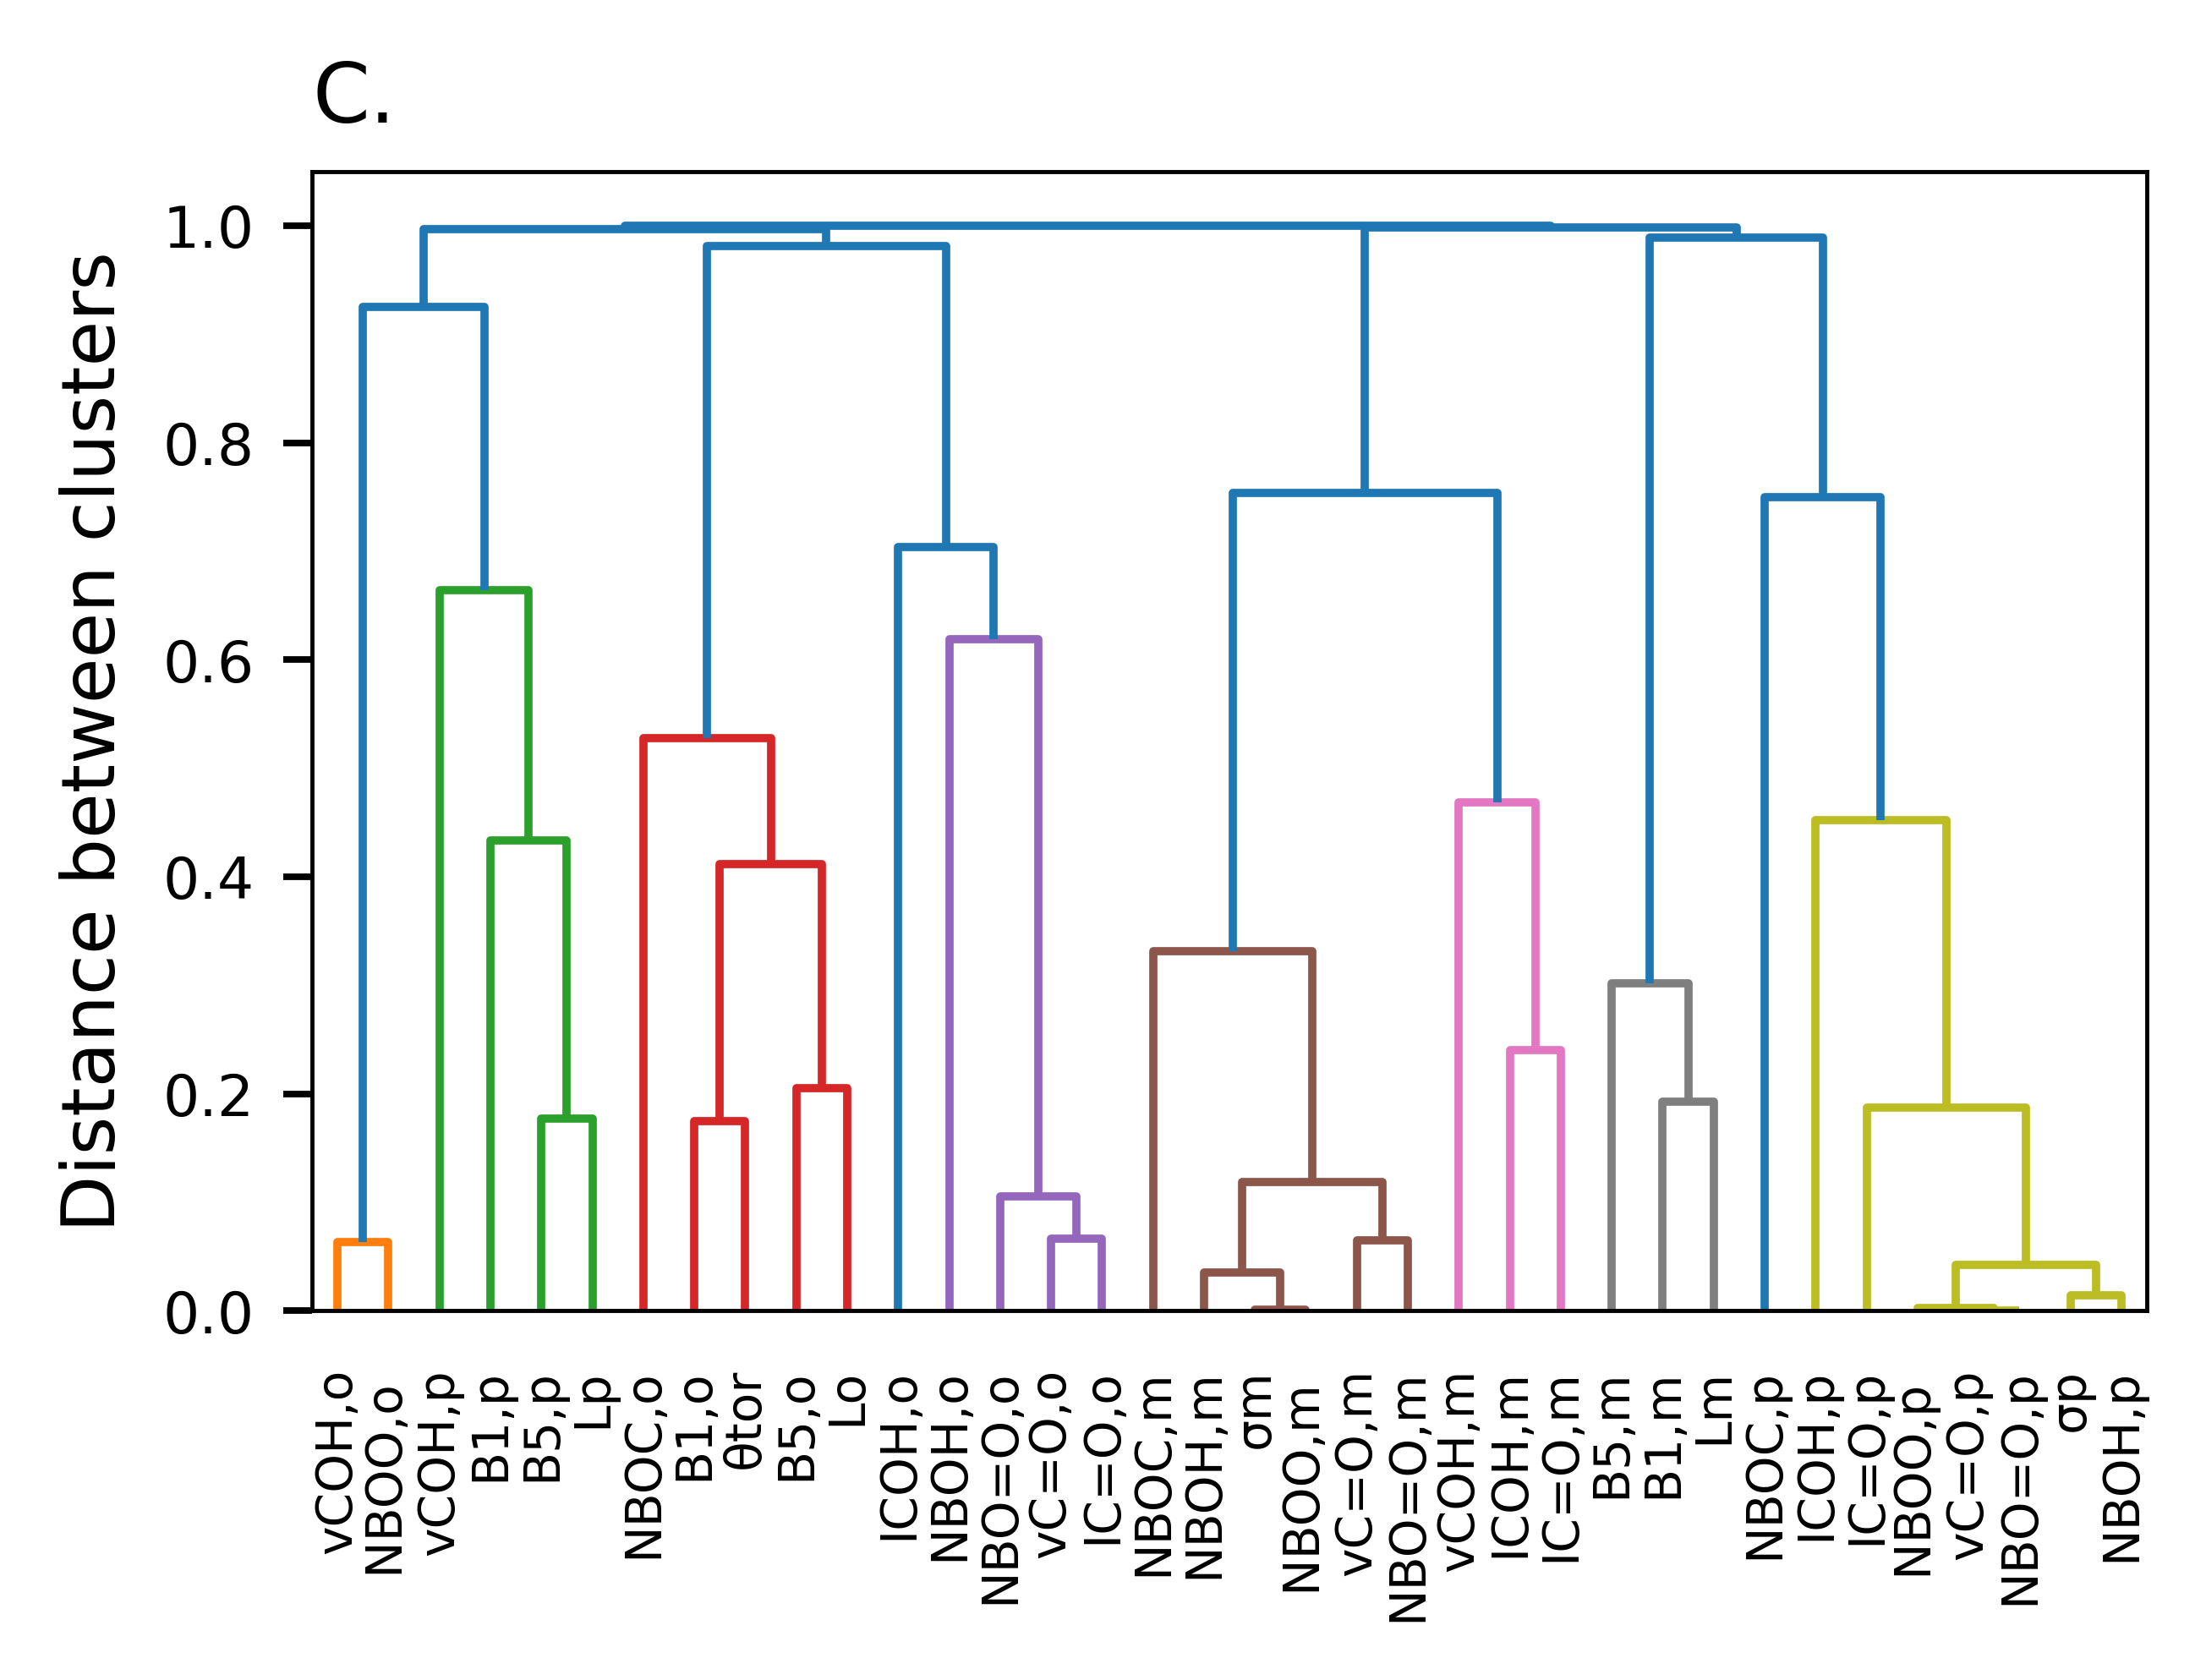

In [ ]:
fig, ax = plt.subplots(figsize=(4,2.5))
#Z_sp = hierarchy.ward(squareform(distance_sp)) #hierarchical clustering
Z_ONO = hierarchy.linkage(squareform(distance_sp), 'complete')# ward ou linkage have same result

plt.ylabel("Distance between clusters", size = 9)
hierarchy.dendrogram(Z_ONO, labels=df_X_ONO.columns, orientation='top', 
           leaf_rotation=90);
plt.xticks(fontsize = 6)
ax.set_title('A.', loc='left', fontsize =10)


#maximum dissimilarity, complete linkage

Text(0.0, 1.0, 'C.')

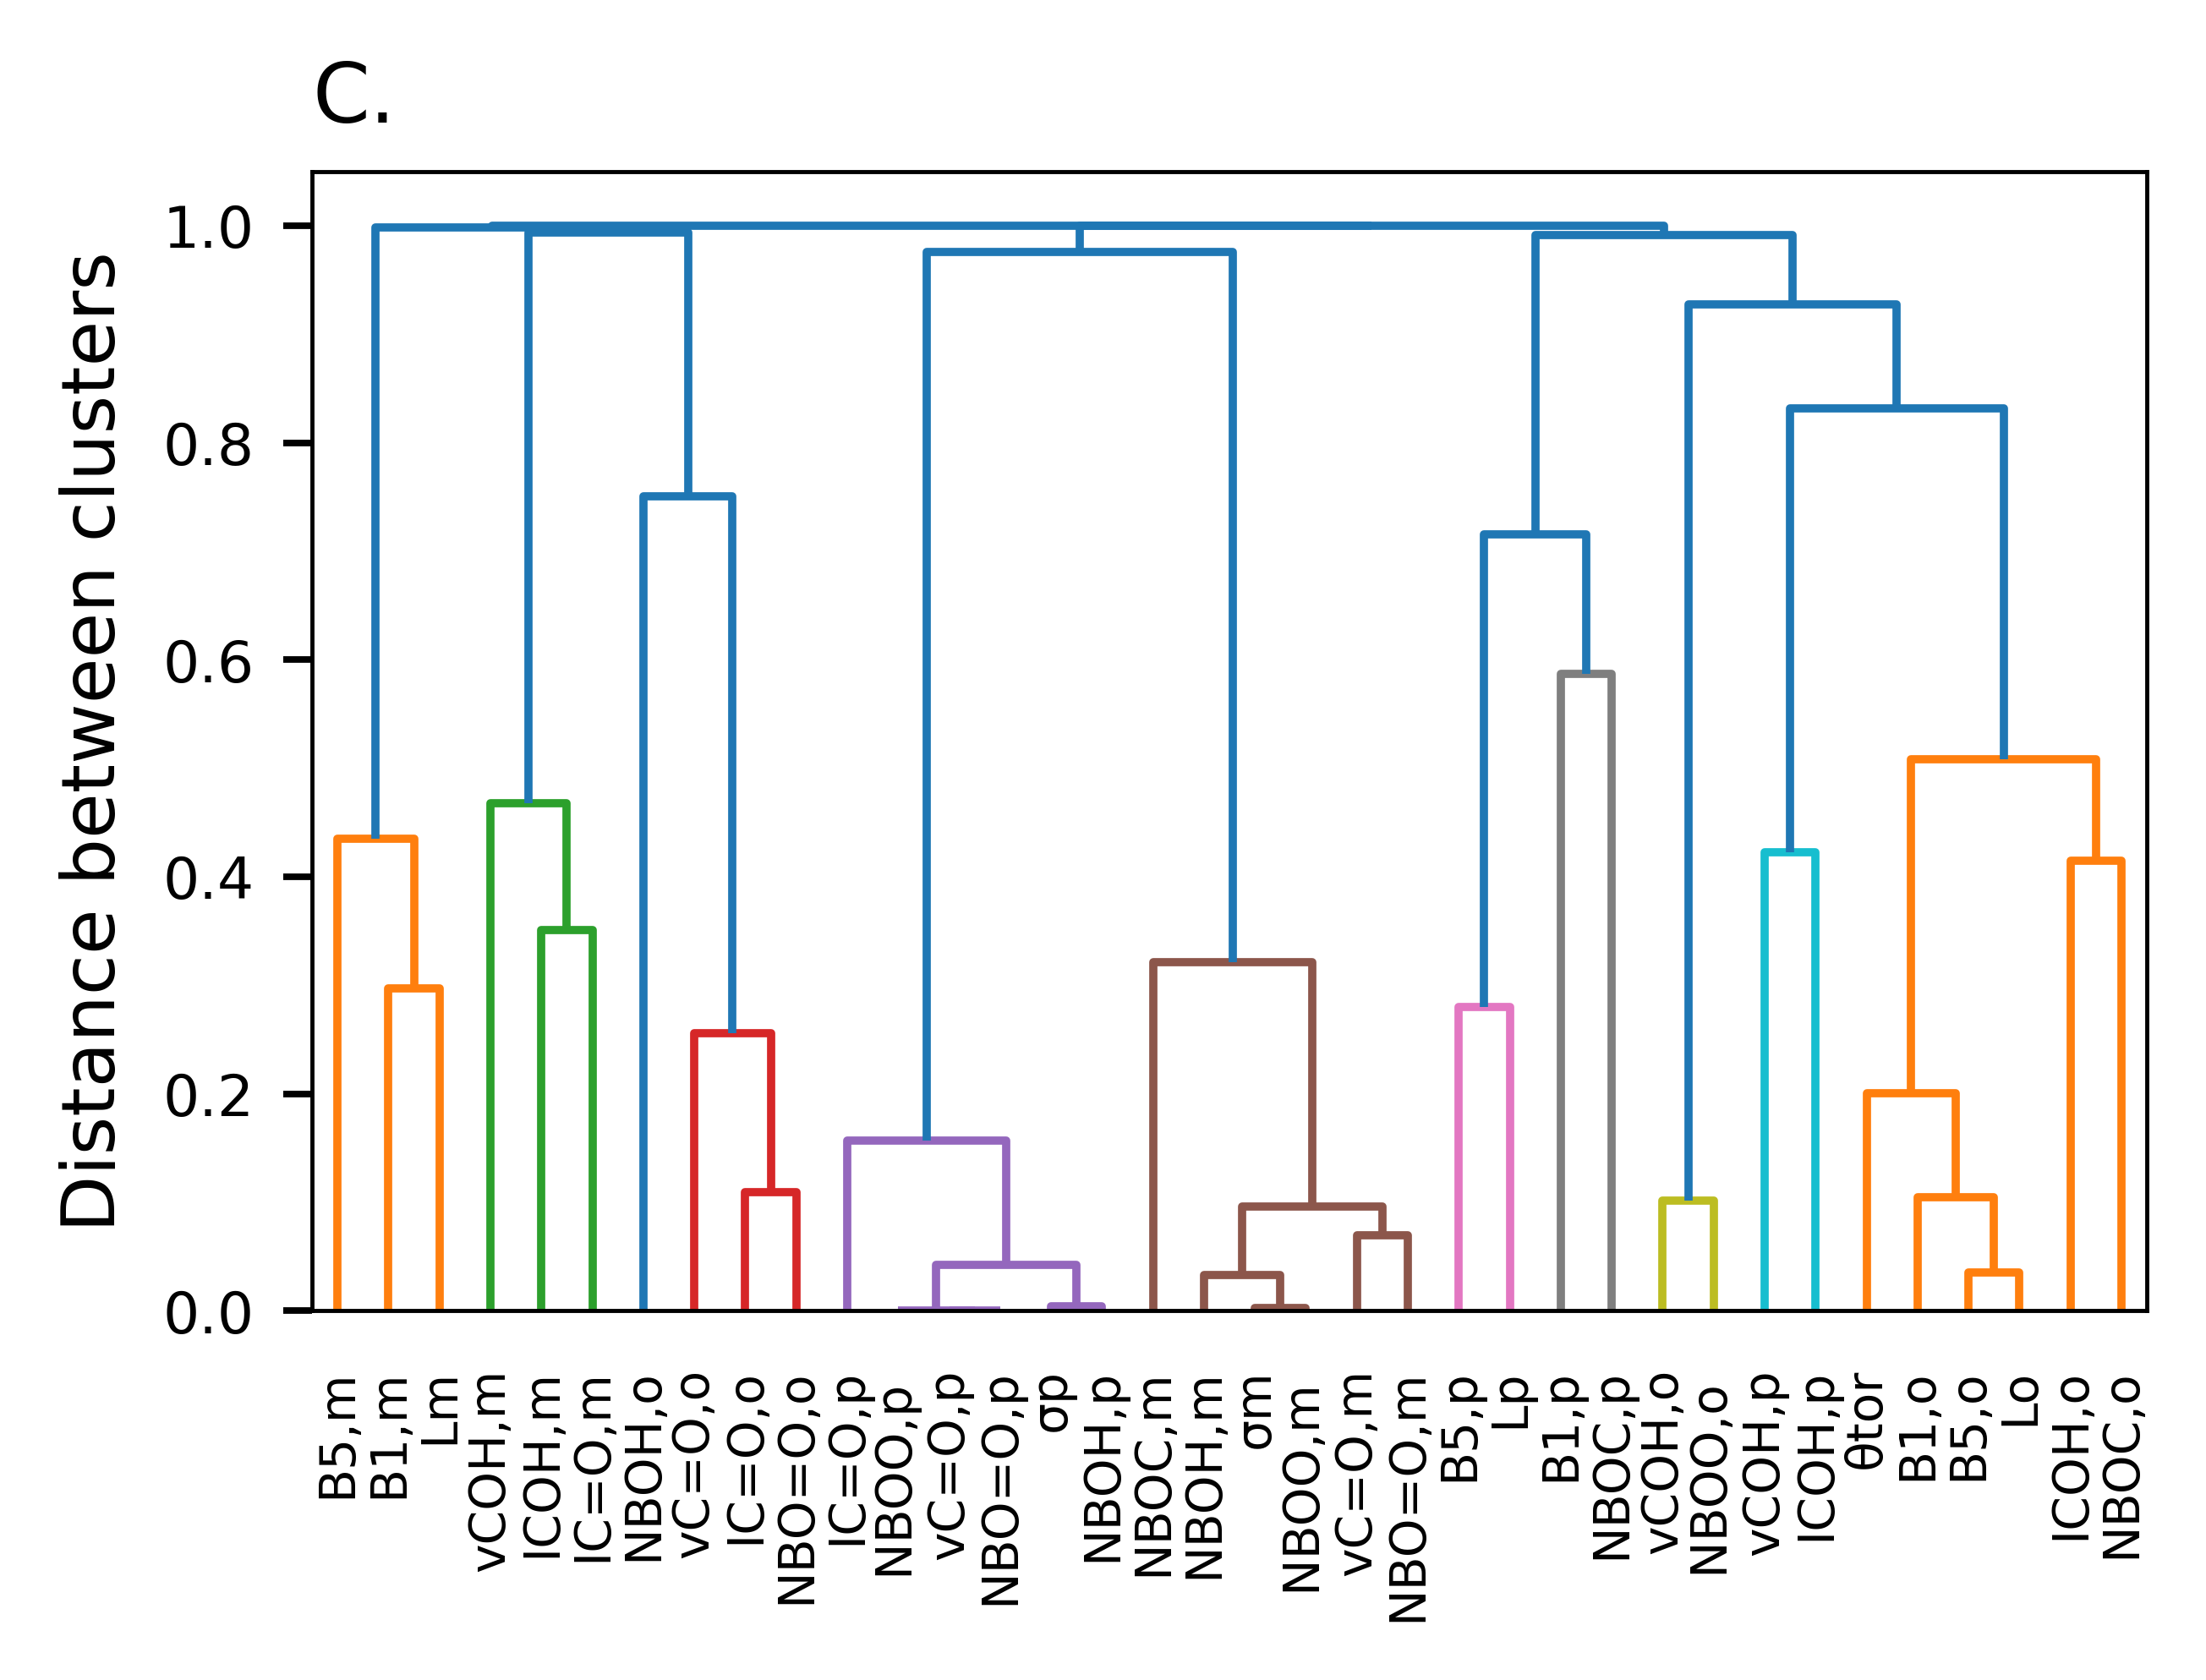

In [33]:
corr_sp = df_X_triarylboranes.corr('spearman') #matrice de correlation

distance_sp = 1 - abs(corr_sp) 


fig, ax = plt.subplots(figsize=(4,2.5))
#Z_sp = hierarchy.ward(squareform(distance_sp)) #hierarchical clustering
Z_triarylboranes = hierarchy.linkage(squareform(distance_sp), 'complete')

plt.ylabel("Distance between clusters", size = 9)
hierarchy.dendrogram(Z_triarylboranes, labels=df_X_triarylboranes.columns, orientation='top', 
           leaf_rotation=90);
plt.xticks(fontsize = 6)
ax.set_title('C.', loc='left', fontsize =10)


The meta and para positions are more correlated with each other than with the ortho position (though this is not particularly evident for ONO, at least)

In [34]:
t_ONO = 0.55
t_triarylboranes = 0.55

In [35]:
from collections import defaultdict

Z = Z_triarylboranes
df_X = df_X_triarylboranes
t = t_triarylboranes

cluster_ids = hierarchy.fcluster(Z, t, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(df_X.columns[idx])
#selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
#selected_features_names = X.columns[selected_features] # renvoie le nom de la feature d'indice le plus bas du cluster. 
#Donc pas de choix particulier.

In [36]:
cluster_id_to_feature_ids

defaultdict(list,
            {12: ['B1,o', 'B5,o', 'Lo', 'ICOH,o', 'NBOC,o', 'θtor'],
             10: ['vCOH,o', 'NBOO,o '],
             3: ['vC=O,o', 'IC=O,o', 'NBO=O,o'],
             4: ['NBOH,o'],
             1: ['B1,m', 'B5,m', 'Lm'],
             6: ['σm', 'vC=O,m', 'NBOC,m', 'NBO=O,m', 'NBOO,m ', 'NBOH,m'],
             2: ['vCOH,m', 'ICOH,m', 'IC=O,m'],
             8: ['B1,p'],
             7: ['B5,p', 'Lp'],
             5: ['σp', 'vC=O,p', 'IC=O,p', 'NBO=O,p', 'NBOO,p ', 'NBOH,p'],
             11: ['vCOH,p', 'ICOH,p'],
             9: ['NBOC,p']})

In [6]:
## for triarylboranes
uncorrelated_features_triaryl = ['B1,o', 'vCOH,o', 'vC=O,o', 'NBOH,o', 'B1,m', 'σm',
                         'vCOH,m', 'B1,p', 'B5,p', 
                         'σp', 'vCOH,p',  'NBOC,p' ]

In [7]:
## for ONO
uncorrelated_features_ONO = ['B1,o', 'vCOH,o', 'ICOH,o', 'vC=O,o', 'NBOH,o', 'B1,m', 'σm',
                         'vCOH,m', 'B1,p', 
                         'σp', 'vCOH,p',  'NBOC,p' ]

In [42]:
df_X_selec_ONO = df_X_ONO.loc[:,uncorrelated_features_ONO]
df_X_selec_triarylboranes = df_X_triarylboranes.loc[:,uncorrelated_features_triaryl]

### Evaluate coefficients for linear model for each structure

In [ ]:
df = pd.DataFrame(columns = dict_models.keys(), index = ["triarylboranes"])
for model in df.columns: 
            print(model)
            try : 
                scores = evaluate_model(dict_models[model]['sigman'], X,Y, n_rep = 10)
                #for i,elt in enumerate(scores) : 
                 #   if elt < -100:
                  #      scores = np.delete(scores,[0,i])
                   #     print('split diverged')
                MAE = abs(round(np.mean(scores),2))
                df.at["triarylboranes",model] = MAE
            except: df.at[descriptor, model] = "dv"

ONO structure

In [61]:
X = df_X_selec_ONO
Y = df_ONO.FIA
model = LinearRegression()

In [62]:
pipeline = Pipeline(steps=[('selector', VarianceThreshold()),('scaler', StandardScaler()), ('m',model)])

In [63]:
pipeline.fit(X,Y)

Pipeline(steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('m', LinearRegression())])

In [64]:
## to get the features seen during fit of the model

#names = get_names("sigman")
names = uncorrelated_features_ONO
fitted_features = list(pipeline[:-1].get_feature_names_out(names))
print(fitted_features)
print(len(fitted_features))

['B1,o', 'vCOH,o', 'ICOH,o', 'vC=O,o', 'NBOH,o', 'B1,m', 'σm', 'vCOH,m', 'B1,p', 'σp', 'vCOH,p', 'NBOC,p']
12


In [ ]:
coefs = pd.DataFrame(
    model.coef_,
    columns=["Coefficients"],
    index=fitted_features,
)
coefs["Absolute coef"] = abs(coefs["Coefficients"])

more_important_coefs_ONO= coefs.sort_values("Absolute coef", ascending = True)

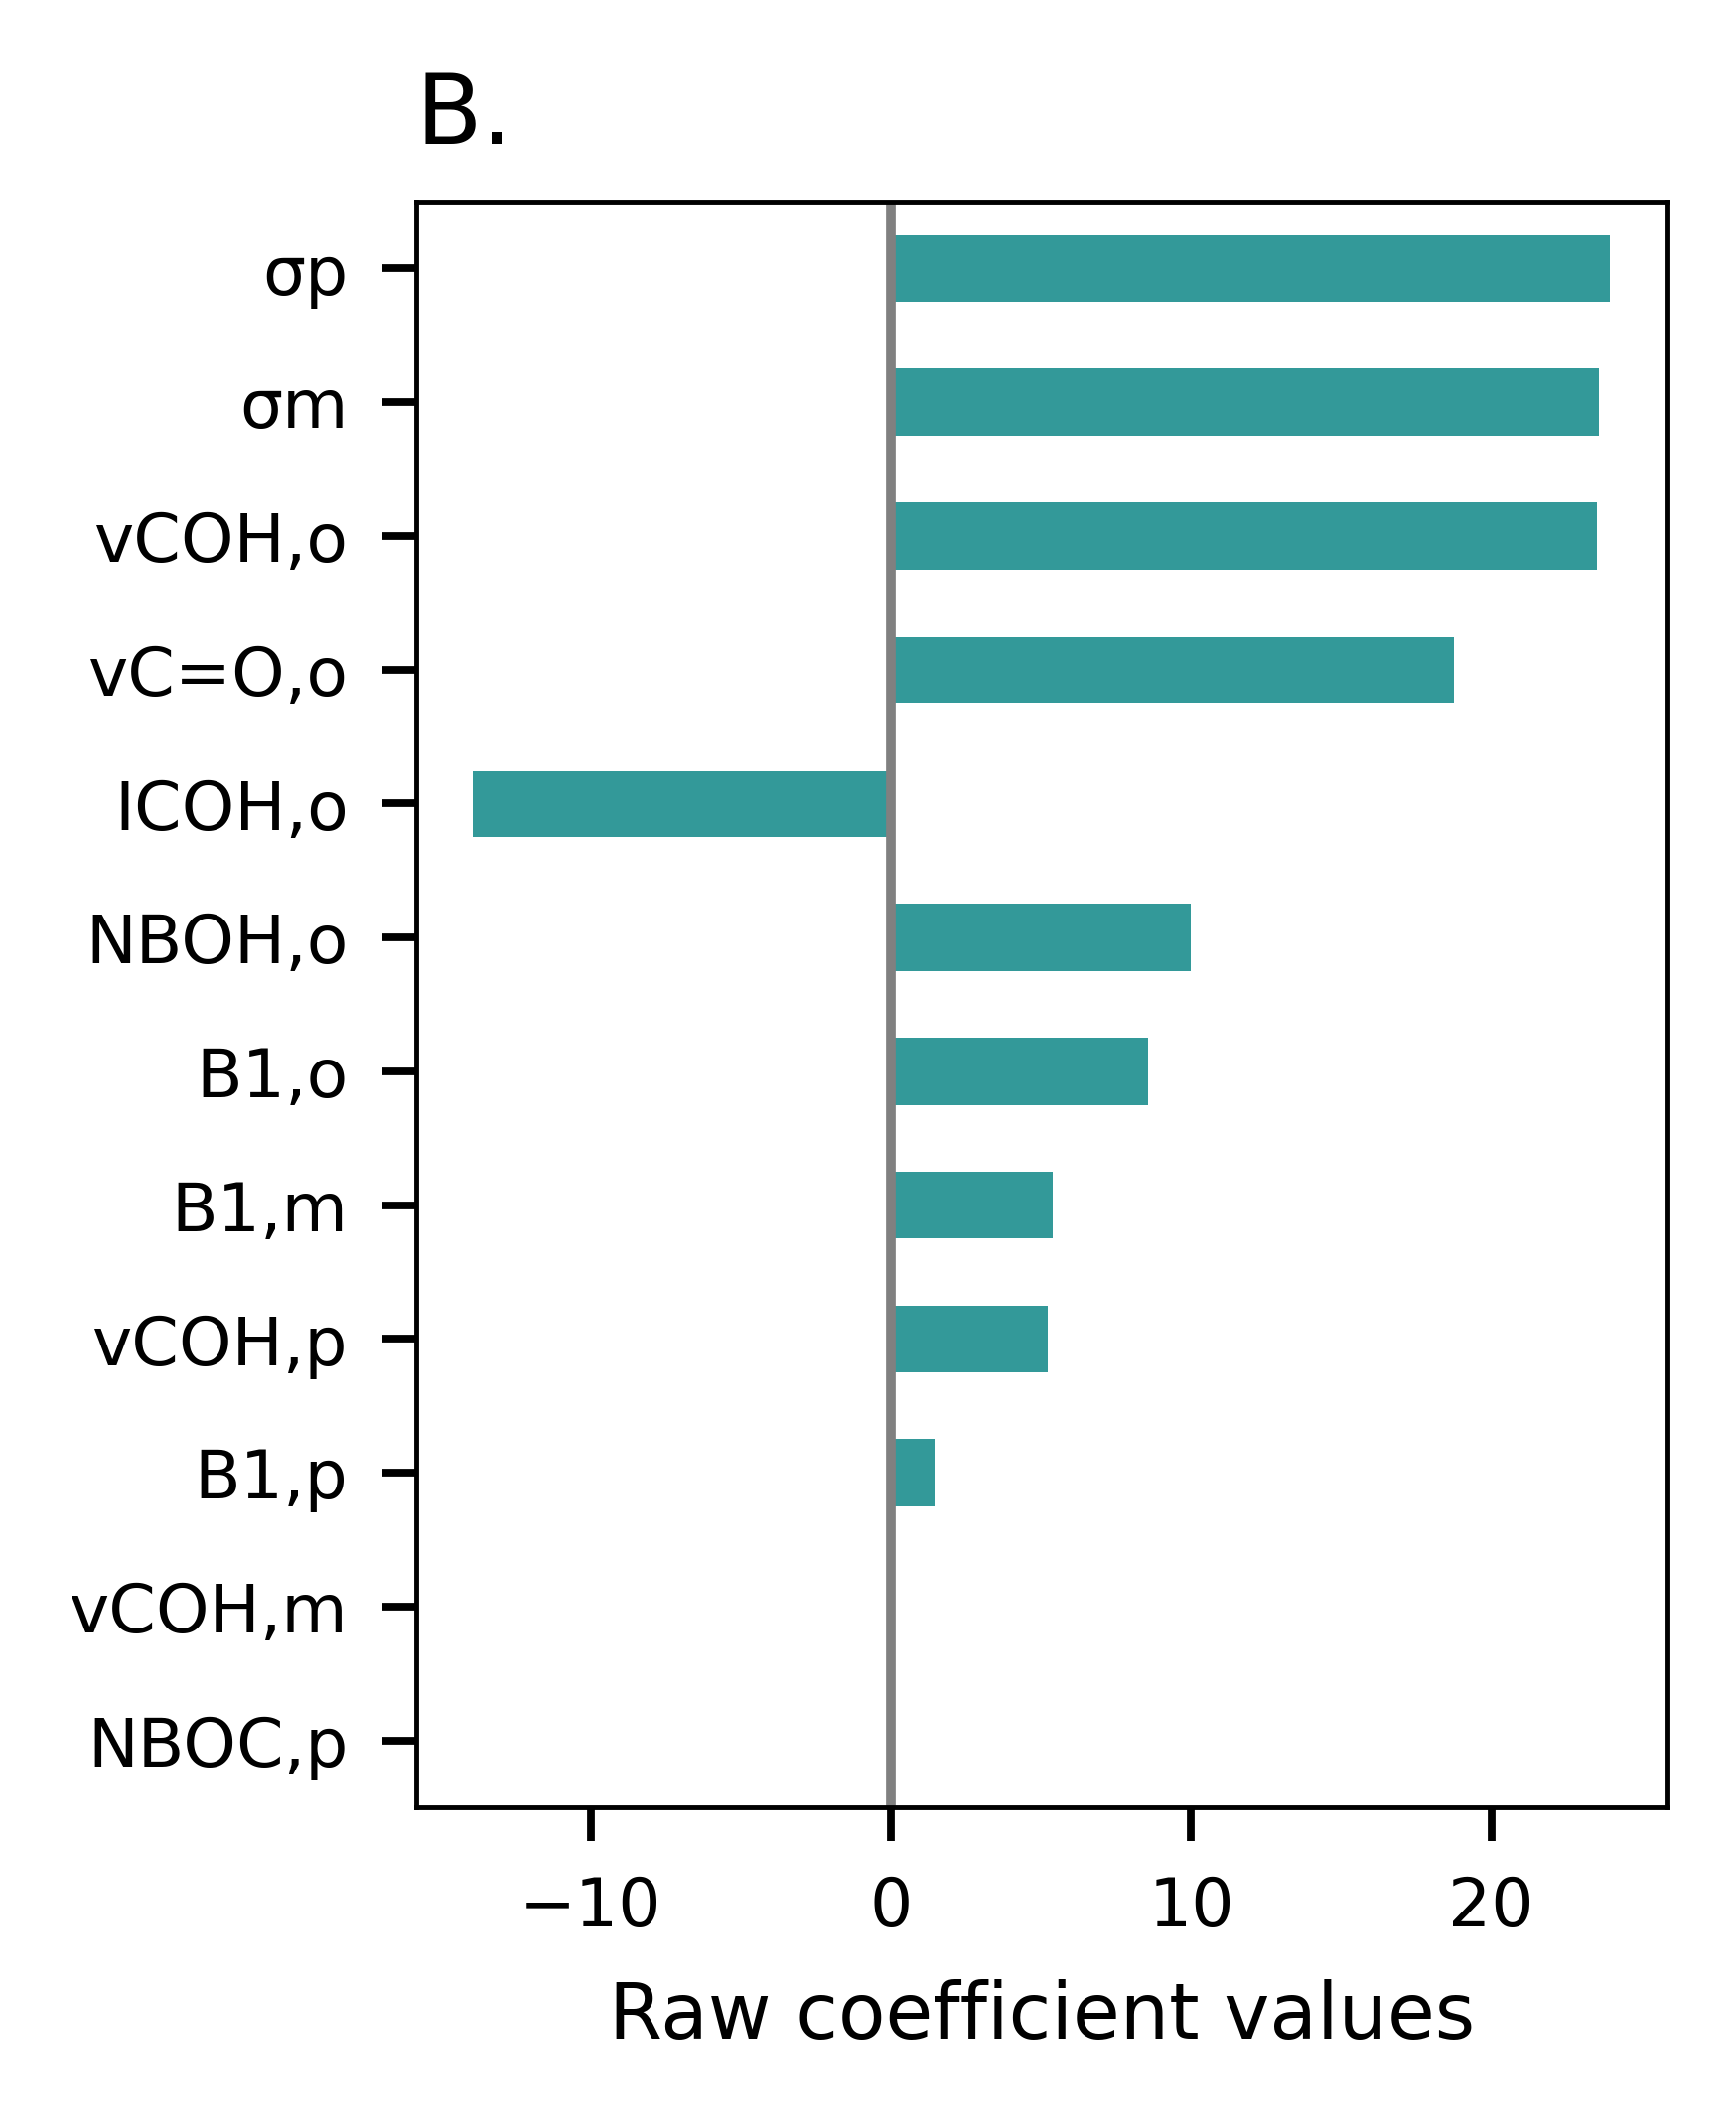

In [66]:
fig, ax = plt.subplots(figsize=(3,3))

more_important_coefs_ONO["Coefficients"].plot.barh(color = 'teal', alpha = 0.8)
ax.set_title('B.', loc='left', fontsize =10)
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

#fig.savefig(f'article/figures/coefficients_ridge_model.svg', facecolor = 'white', format = 'svg', transparent = True, bbox_inches='tight')

### Triarylboranes

In [51]:
X = df_X_selec_triarylboranes
Y = df_triarylboranes.FIA
model = LinearRegression()

In [52]:
pipeline = Pipeline(steps=[('selector', VarianceThreshold()),('scaler', StandardScaler()), ('m',model)])

In [53]:
pipeline.fit(X,Y)

Pipeline(steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('m', LinearRegression())])

In [55]:
## to get the features seen during fit of the model

#names = get_names("sigman")
names = uncorrelated_features_triaryl
fitted_features = list(pipeline[:-1].get_feature_names_out(names))
print(fitted_features)
print(len(fitted_features))

['B1,o', 'vCOH,o', 'vC=O,o', 'NBOH,o', 'B1,m', 'σm', 'vCOH,m', 'B1,p', 'B5,p', 'σp', 'vCOH,p', 'NBOC,p']
12


In [ ]:
coefs = pd.DataFrame(
    model.coef_,
    columns=["Coefficients"],
    index=fitted_features,
)
coefs["Absolute coef"] = abs(coefs["Coefficients"])

more_important_coefs_triarylboranes= coefs.sort_values("Absolute coef", ascending = True)

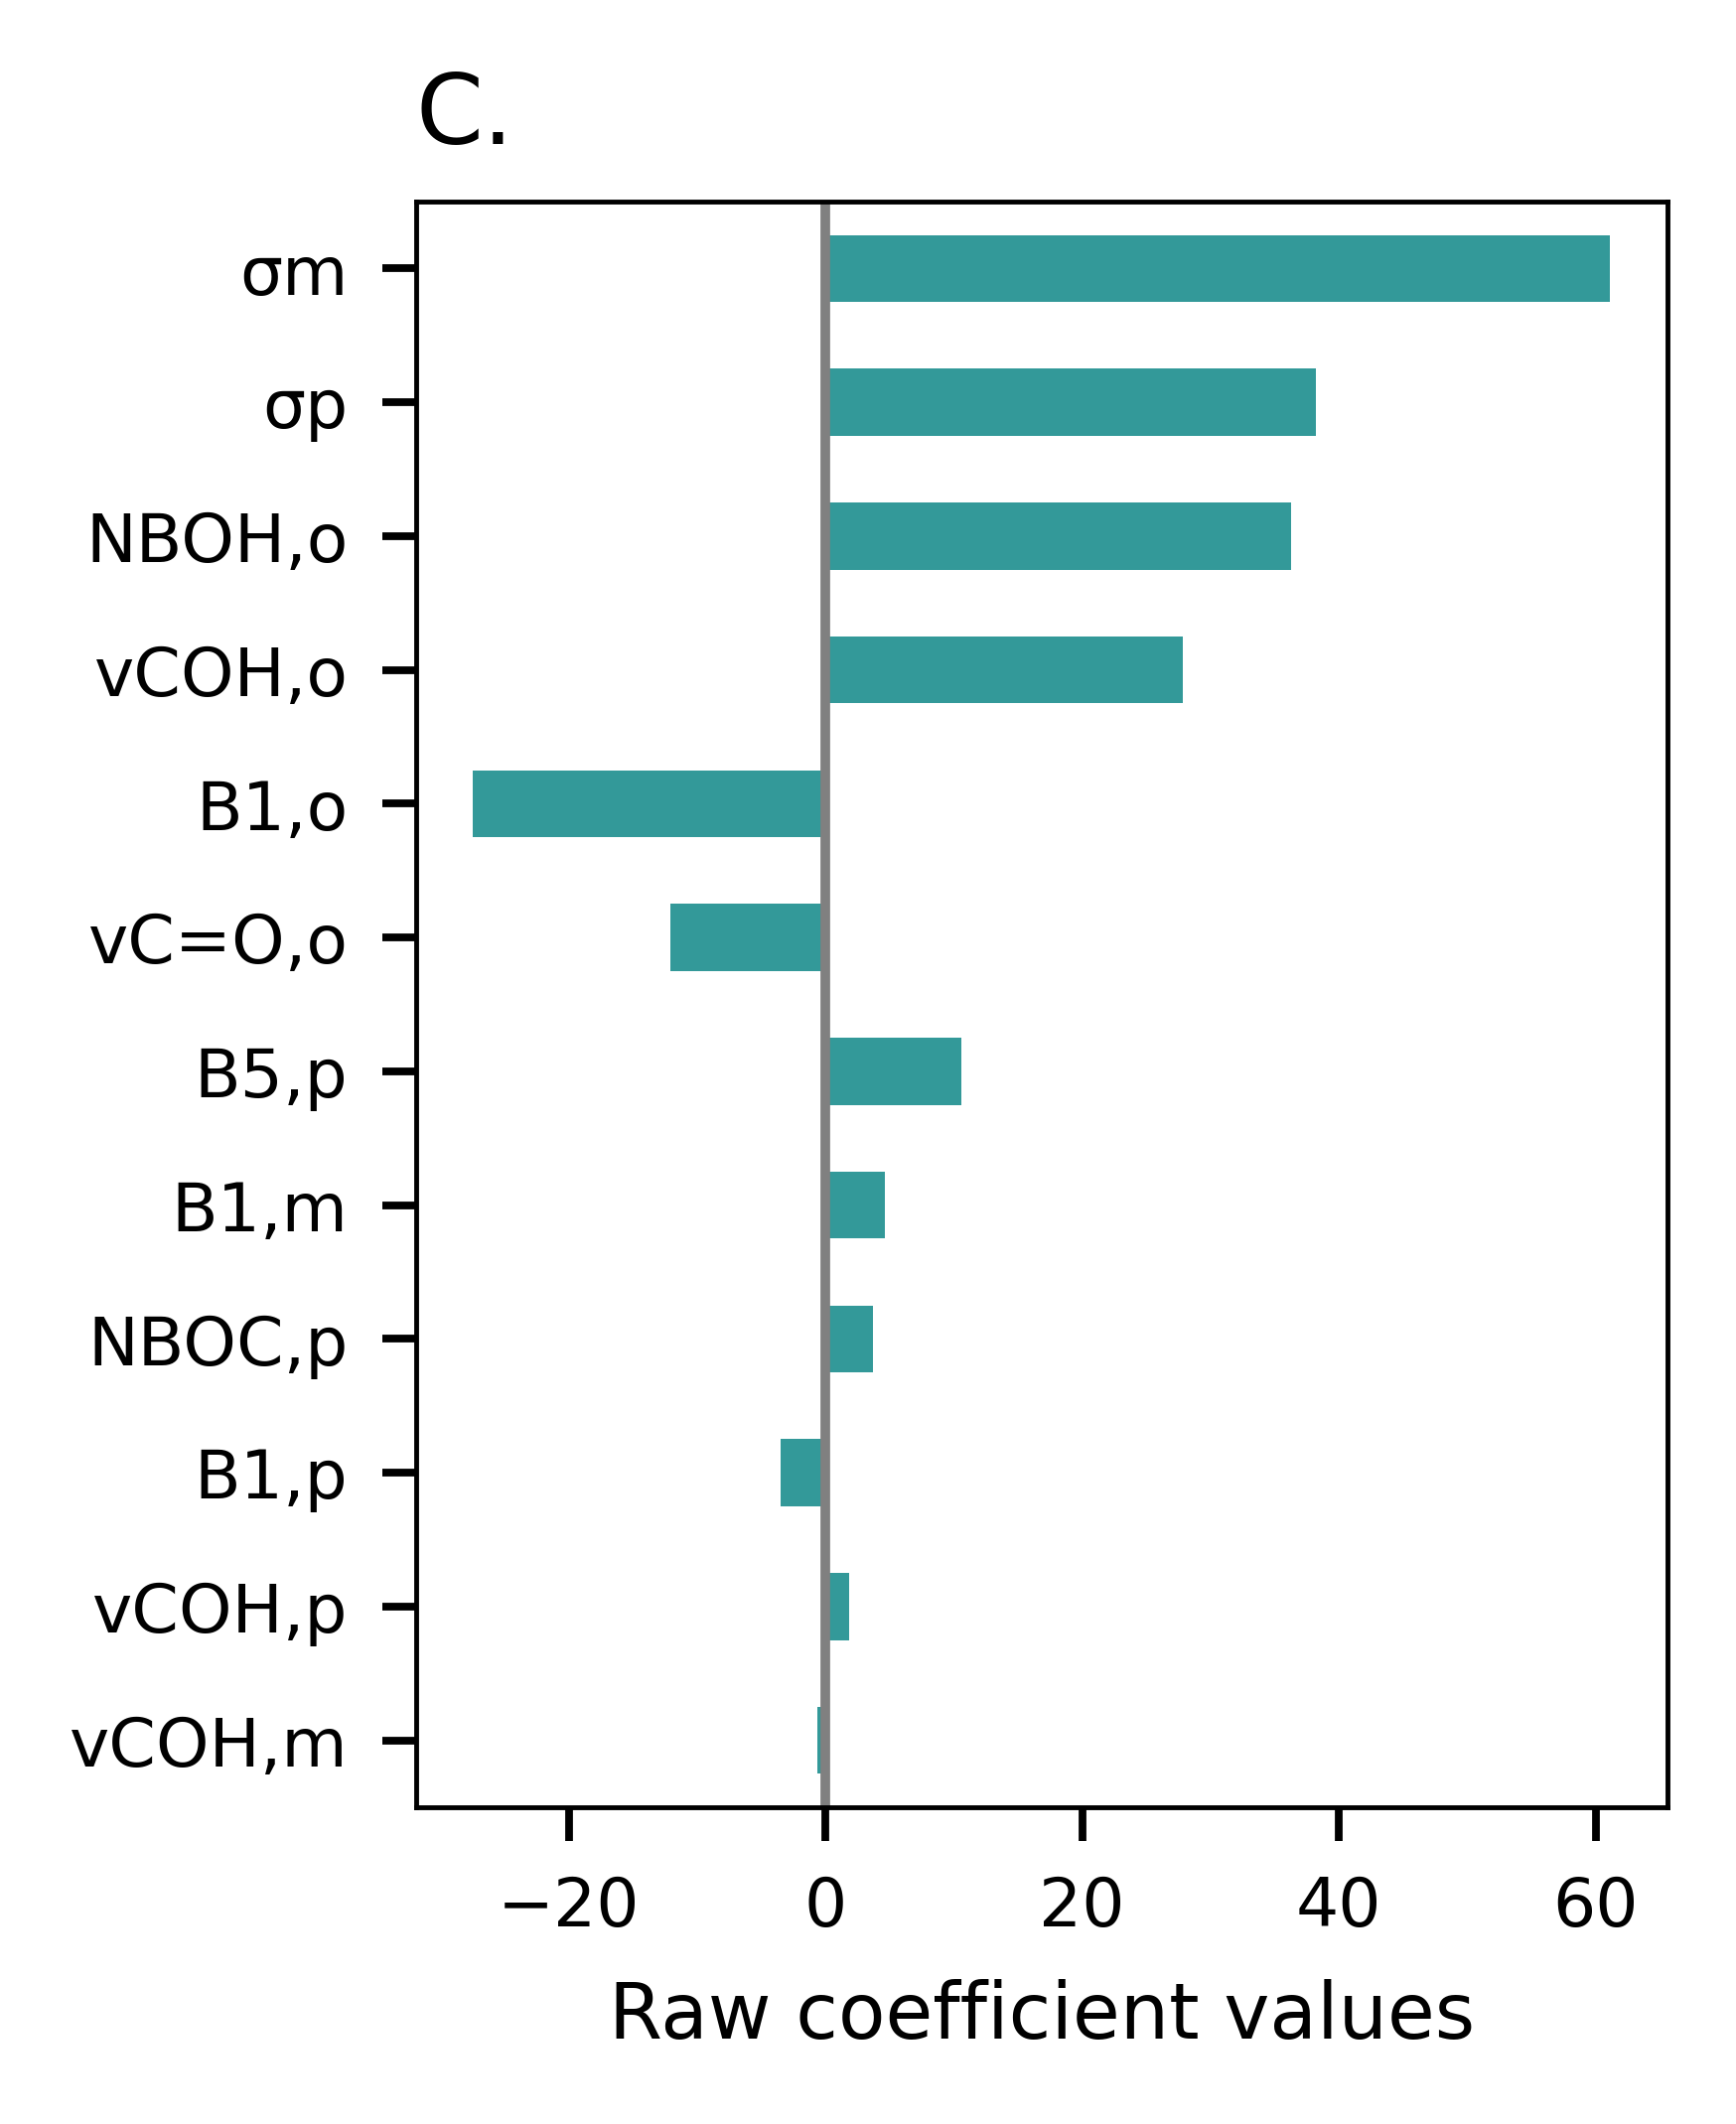

In [59]:
fig, ax = plt.subplots(figsize=(3,3))

more_important_coefs_triarylboranes["Coefficients"].plot.barh(color = 'teal', alpha = 0.8)
ax.set_title('C.', loc='left', fontsize =10)
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

#fig.savefig(f'article/figures/coefficients_ridge_model.svg', facecolor = 'white', format = 'svg', transparent = True, bbox_inches='tight')

## Plot figure

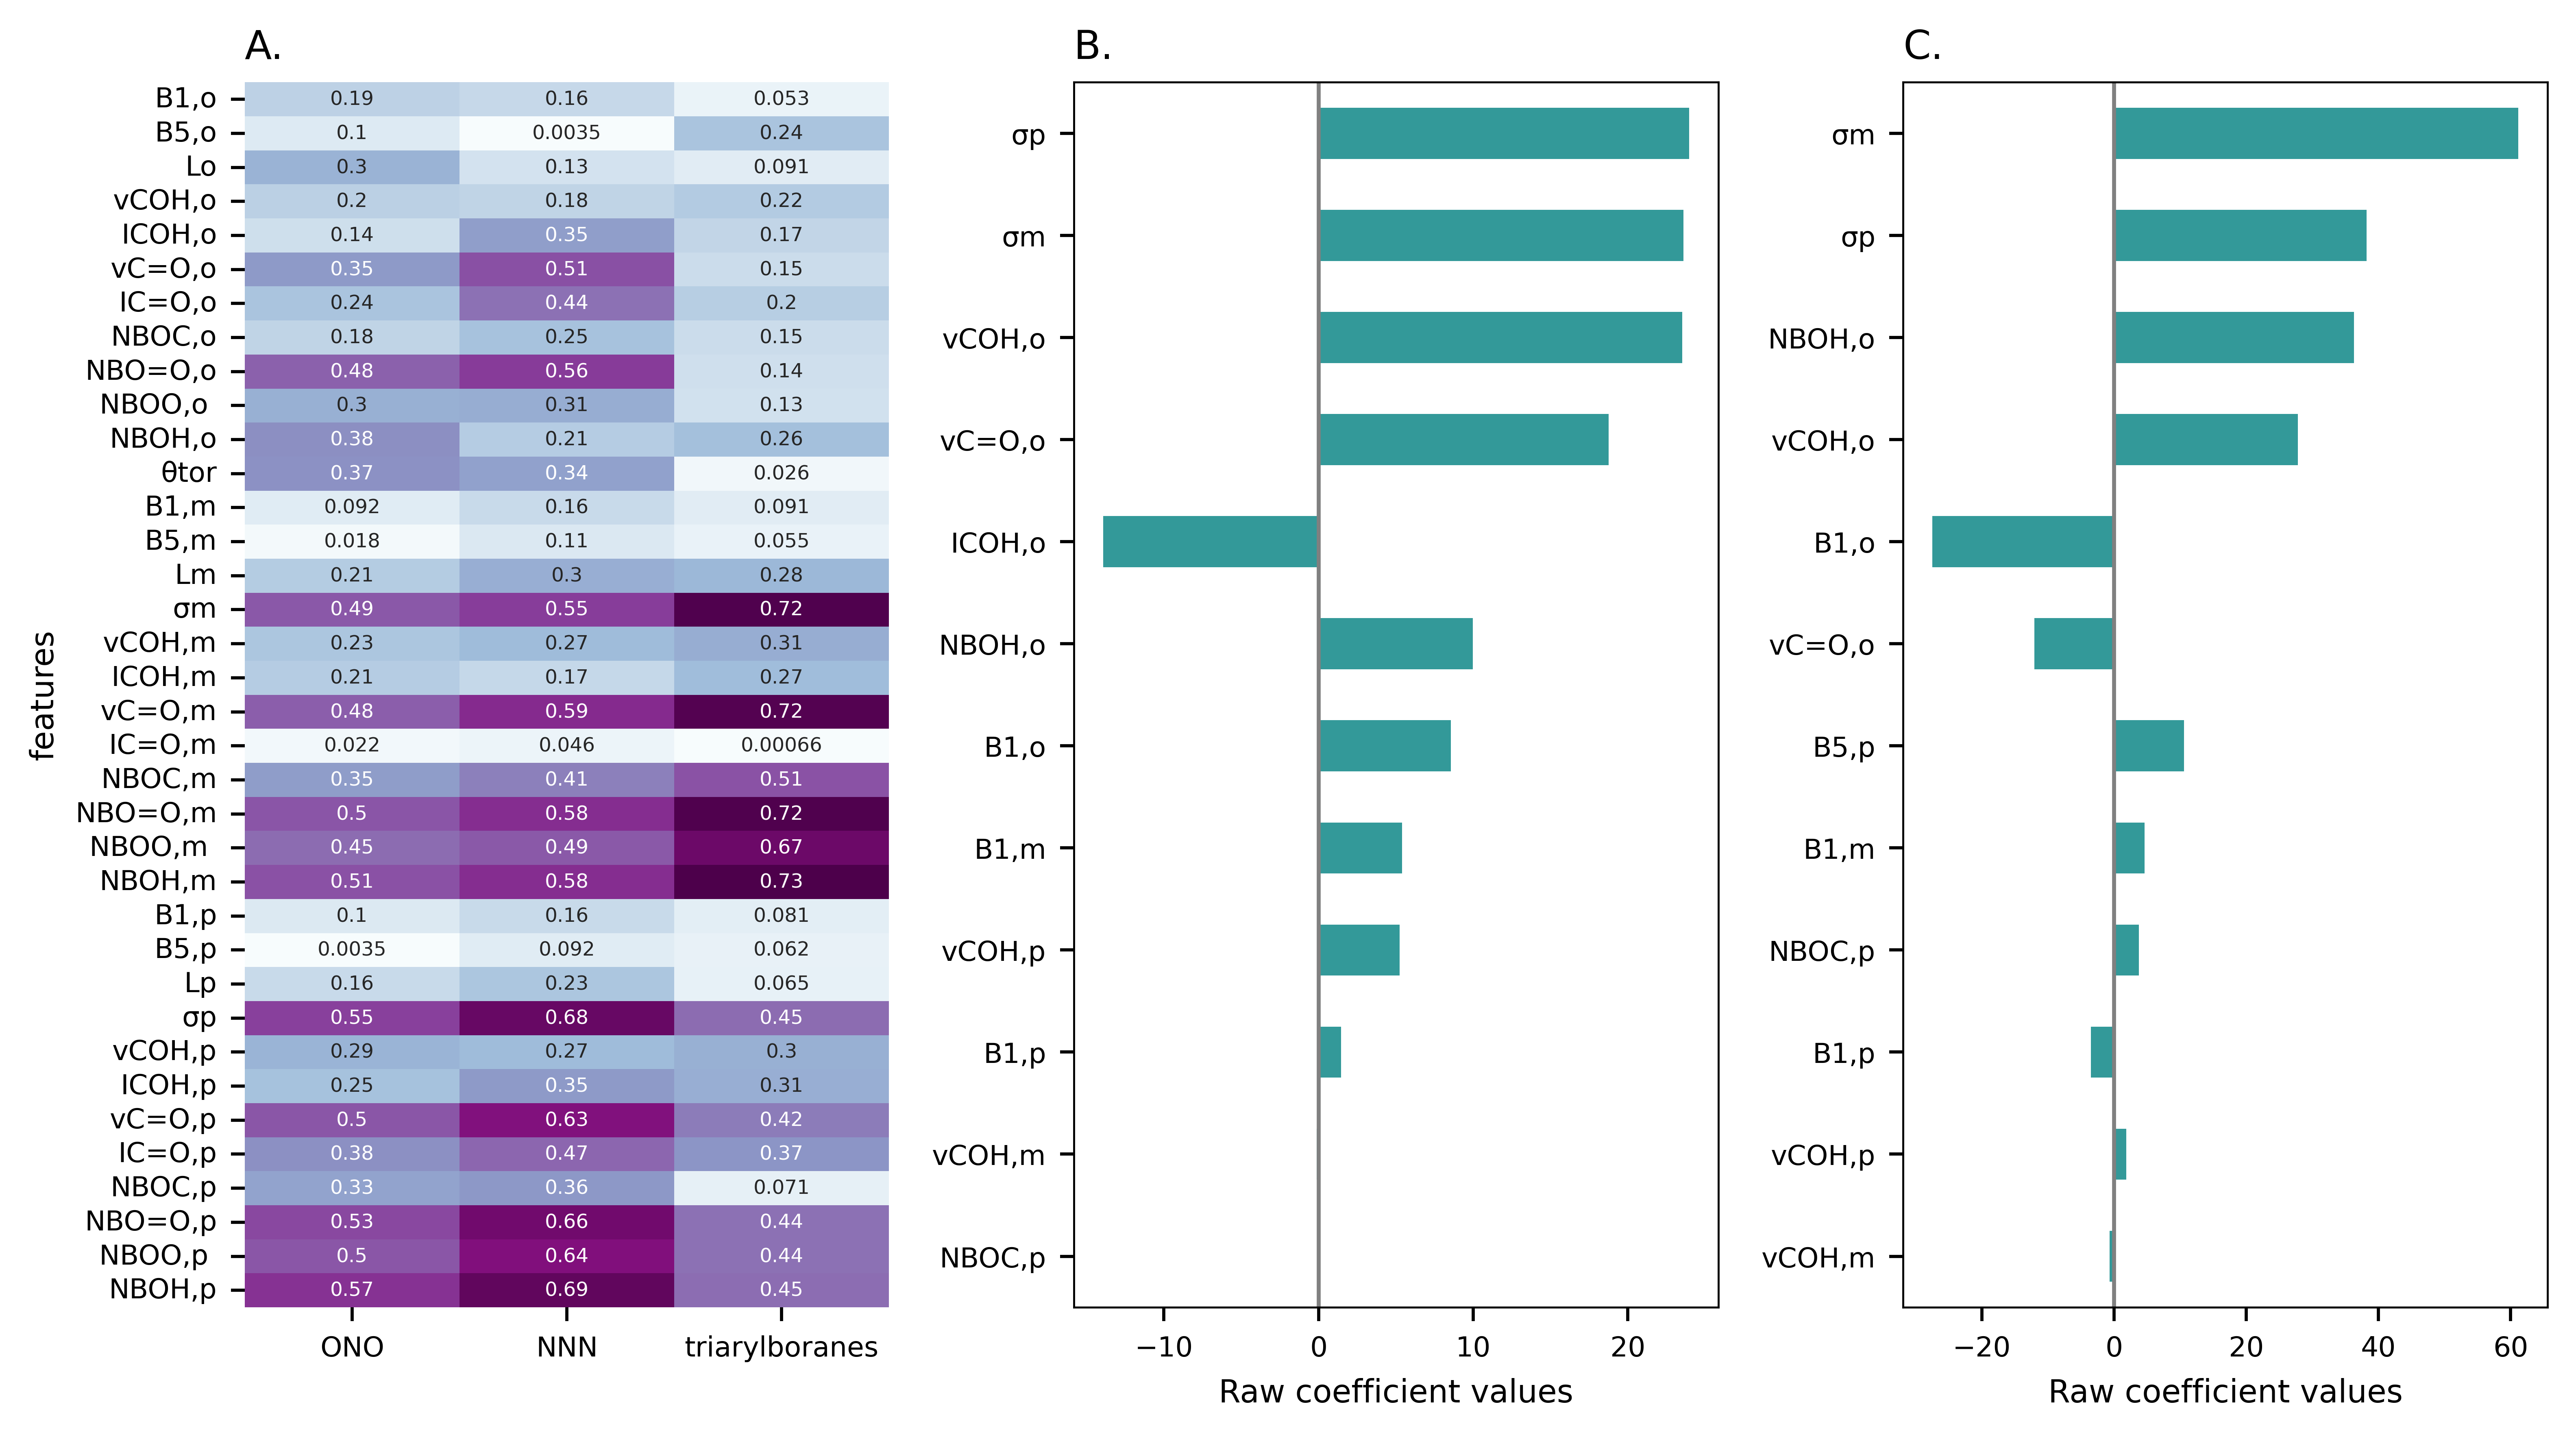

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))

## 1st plot

heatmap = sns.heatmap(df_correlation, ax = axes[0], annot = True, cmap = 'BuPu', cbar = False)
axes[0].set_title('A.', loc='left', fontsize =10)

##2nd plot


more_important_coefs_ONO["Coefficients"].plot.barh(color = 'teal', 
                                                              alpha = 0.8, ax = axes[1])
axes[1].set_title('B.', loc='left', fontsize =10)
axes[1].axvline(x=0, color=".5")
axes[1].set_xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

## 3rd plot

more_important_coefs_triarylboranes["Coefficients"].plot.barh(color = 'teal', 
                                                              alpha = 0.8, ax = axes[2])
axes[2].set_title('C.', loc='left', fontsize =10)
axes[2].axvline(x=0, color=".5")
axes[2].set_xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)


plt.tight_layout()

fig.savefig(f'../results/interpretability/hammett_descriptors/correlation_coeff_linear_model.png', facecolor = 'white', format = 'png', transparent = False, bbox_inches='tight')

### Permutation importance

#### Choose model

In [69]:
df_X_perm_ONO = df_X_ONO.loc[:,uncorrelated_features_ONO]
X_perm_ONO = np.array(df_X_perm_ONO)
Y_ONO = df_ONO.FIA

df_X_perm_triarylboranes = df_X_triarylboranes.loc[:,uncorrelated_features_triaryl]
X_perm_triarylboranes = np.array(df_X_perm_triarylboranes)
Y_triarylboranes = df_triarylboranes.FIA

In [73]:
df = pd.DataFrame(columns = dict_models.keys())

In [75]:
for model in df.columns :
    print(model)
    try :
        scores = evaluate_model(dict_models[model]['hammett'], X_perm_ONO,Y_ONO, n_rep = 10)
        MAE = abs(round(np.mean(scores),2))
        df.at["ONO ",model] = MAE
    except: df.at["ONO", model] = "dv"

Linear
LR
Bayes. Ridge
LASSO
SVR
Tree
RF
Grad. Boost.
GPR
KNN
MLP


In [78]:
df

,Linear,LR,Bayes. Ridge,LASSO,SVR,Tree,RF,Grad. Boost.,GPR,KNN,MLP
ONO,15.27,15.29,15.24,15.23,16.1,14.79,10.56,6.52,12.07,18.94,15.29
triarylboranes,22.11,22.14,22.1,22.12,25.98,26.87,21.77,16.66,29.21,35.21,22.02


In [77]:
for model in df.columns :
    print(model)
    try :
        scores = evaluate_model(dict_models[model]['hammett'], X_perm_triarylboranes,Y_triarylboranes, n_rep = 10)
        MAE = abs(round(np.mean(scores),2))
        df.at["triarylboranes ",model] = MAE
    except: df.at["triarylboranes", model] = "dv"

Linear
LR
Bayes. Ridge
LASSO
SVR
Tree
RF
Grad. Boost.
GPR
KNN
MLP


In [79]:
df.to_excel('../results/interpretability/hammett_descriptors/MAE_models_sigman_uncorrelated_features.xlsx')

#### Permutation importance

In [80]:
from sklearn.inspection import permutation_importance

def get_mean_importances(model, n_rep, n_fold, X, Y, input_features):
    Pi = []
    
    for i in range(n_rep):
        
        KF = KFold(n_splits=n_fold, shuffle=True)#pas fixer le random state sinon il fait les meme split a chaque n_rep
        for i, (train_index, test_index) in enumerate(KF.split(X,Y)):
            X_train = X[train_index]
            X_test = X[test_index]
            Y_train = Y[train_index]
            Y_test = Y[test_index]
            selector = VarianceThreshold()
            selector.fit(X_train) ## features that have same value 
            X_train = selector.transform(X_train)# for every molecule are eliminated
            X_test = selector.transform(X_test)
            feature_names = selector.get_feature_names_out(input_features)#should not change accross repetitions
            scaler = StandardScaler().fit(X_train) ## descriptors are scaled
            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)        
            model.fit(X_train, Y_train)
            pi = permutation_importance(model, X_train, Y_train, scoring=None, 
                                n_repeats=10, # number of times each feature is permuted
                                max_samples=3.0)
            Pi.append(pi)
    
    mean_importances = np.zeros((len(feature_names)))
    std = np.zeros((len(feature_names)))
    for i in range(len(Pi)):
        mean_importances += Pi[i]['importances_mean']
        std += Pi[i]['importances_std']
    mean_importances = mean_importances/len(Pi) #all means are added and divided by the number of repetitions
    std = std/len(Pi)
    
    return(feature_names, mean_importances, std )

def more_important_features_mean(mean_importances, std, feature_names, imp_min):
    
    
    restr_names   = []
    restr_imp = []
    restr_std = []
    for i,imp in enumerate(mean_importances):
        if imp > imp_min:
            restr_names.append(feature_names[i])
            restr_imp.append(imp)
            restr_std.append(std[i])
    plt.bar(restr_names, restr_imp, yerr = restr_std)
    plt.xticks(rotation=25, rotation_mode='default', ha = 'right')
    plt.ylabel('importance (%)')
    plt.margins(0.2)
    plt.tight_layout()
    plt.show()
    
    #fig.savefig('figures/permutation_importance/important_params_quantum.png', transparent = False, format = 'png')
    
    return restr_names, restr_imp, restr_std

In [82]:
model = dict_models["Grad. Boost."]['hammett']
n_rep = 10

In [83]:
feature_names_ONO, mean_importances_ONO, std_ONO = get_mean_importances(model, n_rep, 10, X_perm_ONO, Y_ONO, uncorrelated_features_ONO)

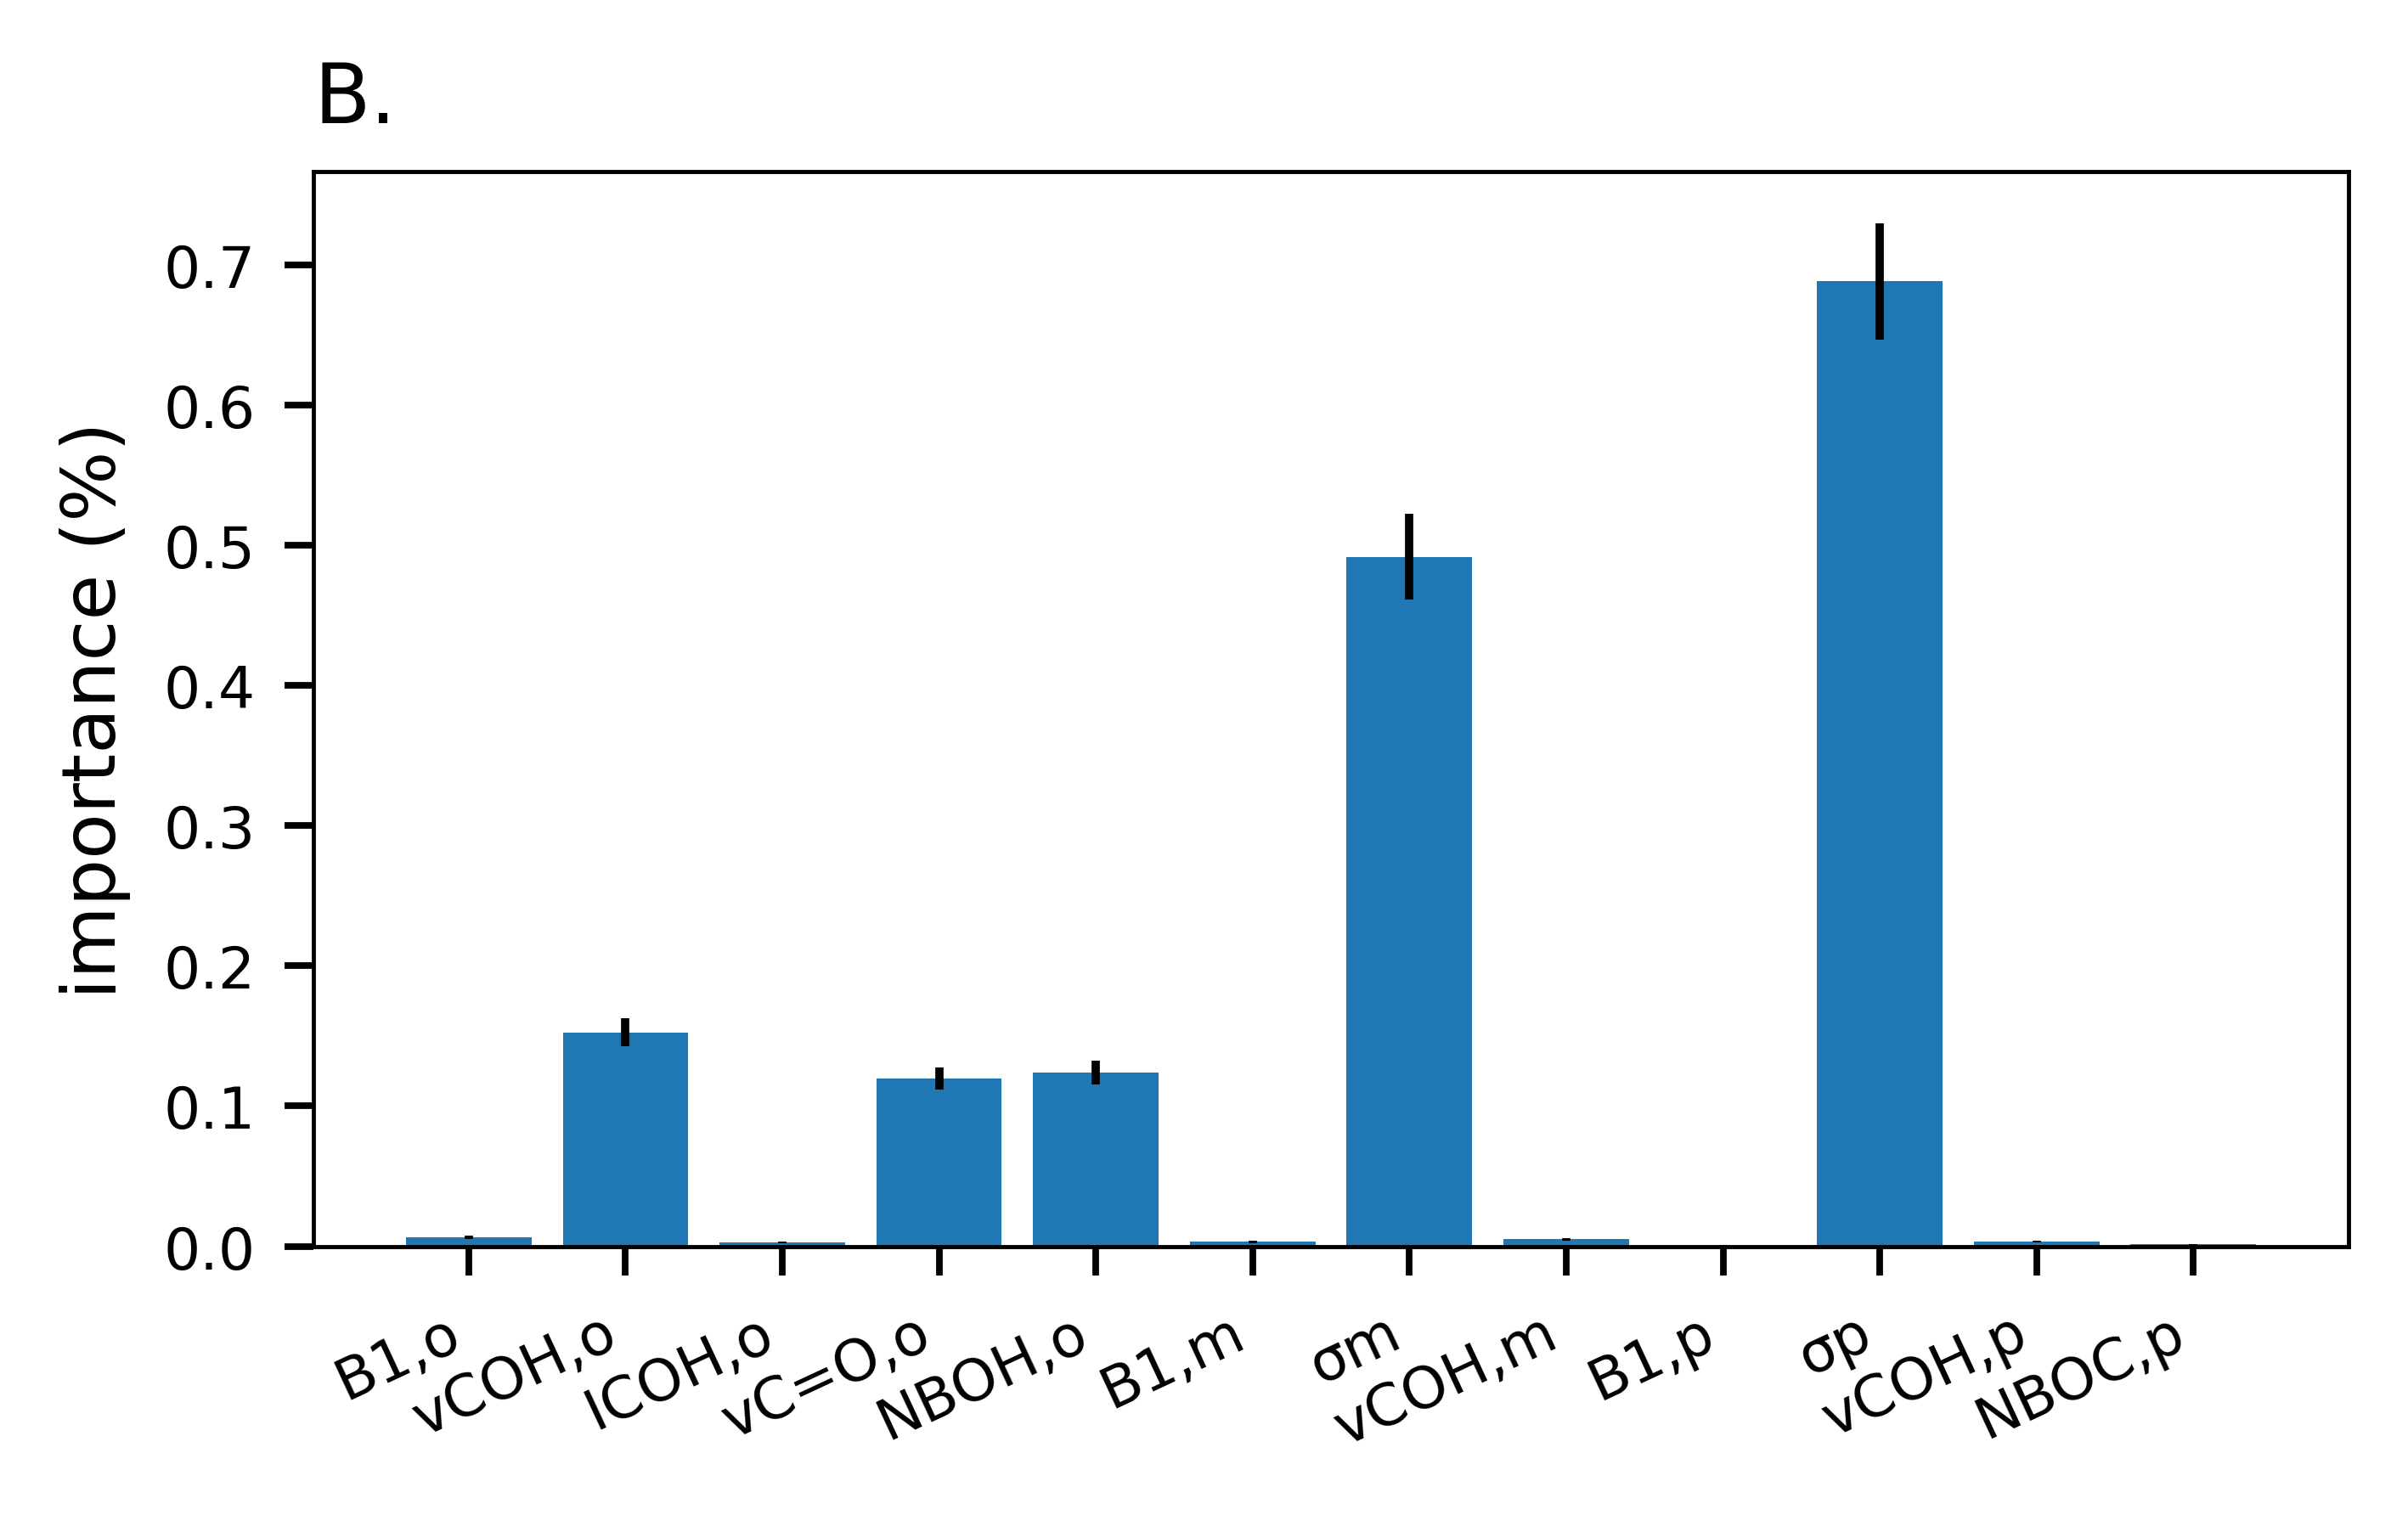

In [84]:
fig, ax = plt.subplots(figsize=(4,2.5))

plt.bar(feature_names_ONO, mean_importances_ONO, yerr = std_ONO)

plt.xticks(rotation=25, rotation_mode='default', ha = 'right', fontsize = 7)
ax.set_title('B.', loc='left', fontsize =10)
plt.ylabel('importance (%)', size = 9)
#plt.margins(0.2)
plt.tight_layout()
plt.show()

#fig.savefig(f'article/figures/permutation_importance_sigman_ONO_GB.svg', facecolor = 'white', format = 'svg', transparent = True, bbox_inches='tight')
    

Triarylboranes

In [85]:
model = dict_models["Grad. Boost."]['hammett']
n_rep = 10

In [86]:
feature_names_triarylboranes, mean_importances_triarylboranes, std_triarylboranes = get_mean_importances(model, n_rep, 10, X_perm_triarylboranes, Y_triarylboranes, uncorrelated_features_triaryl)

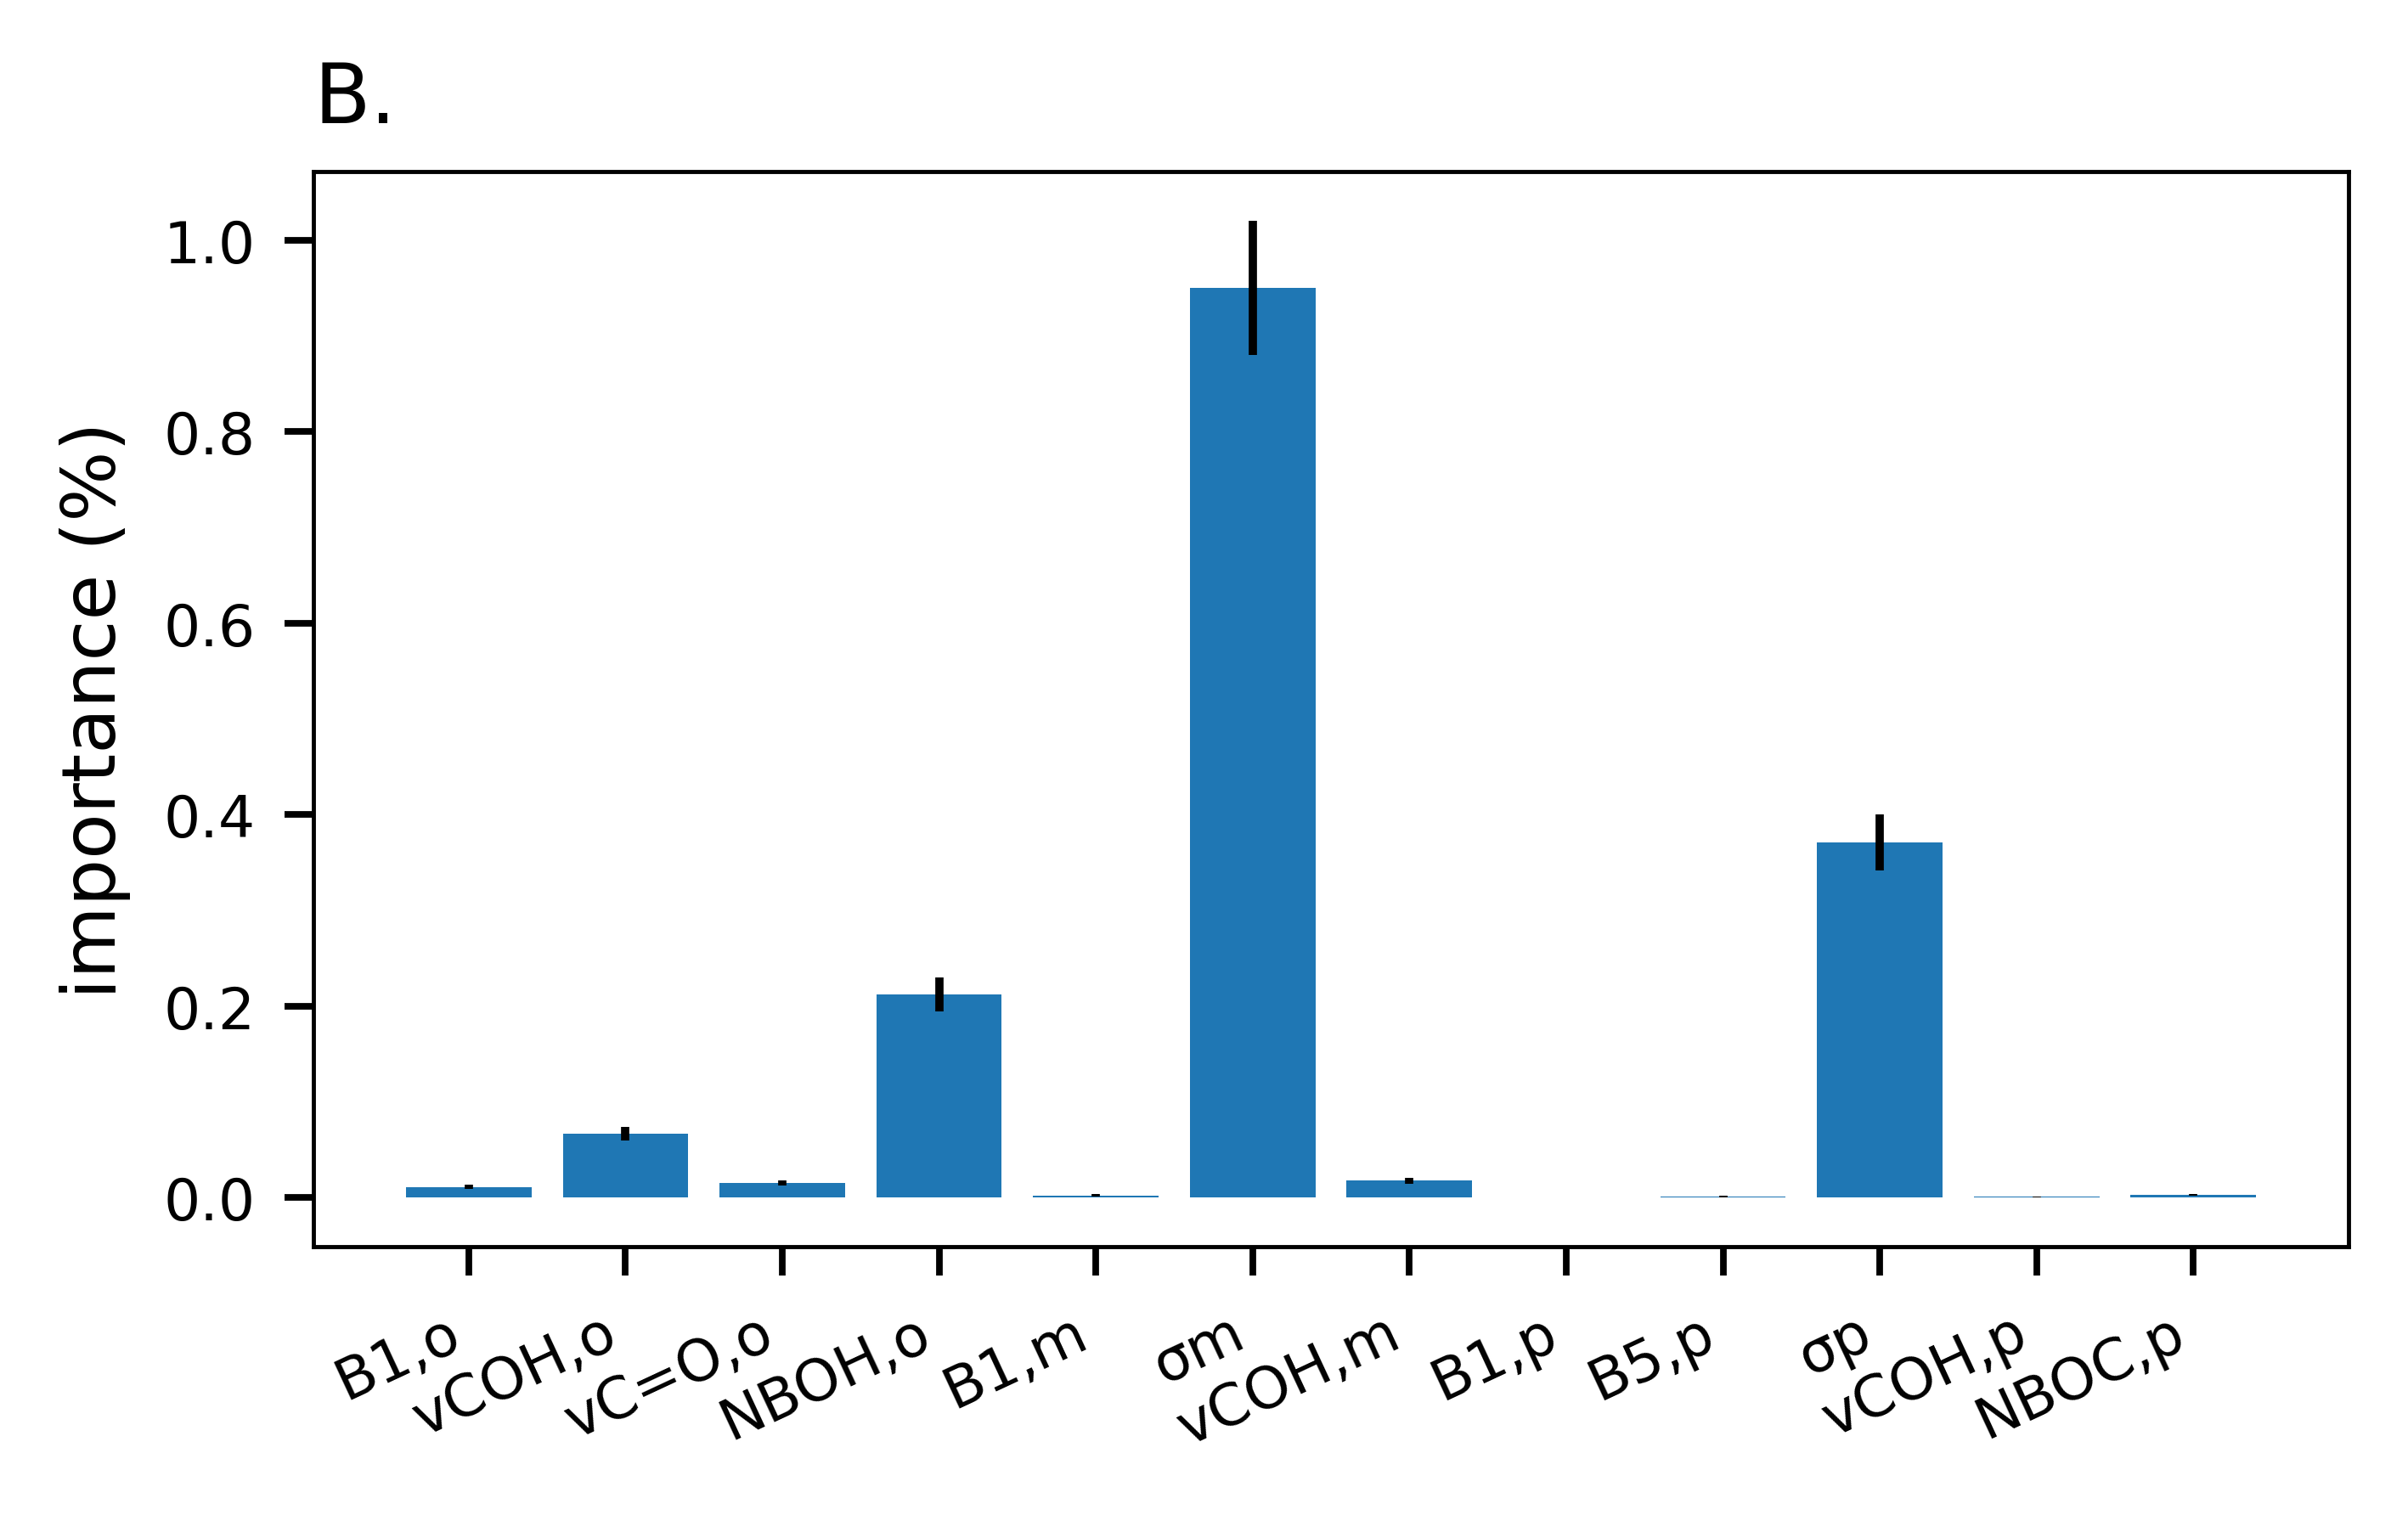

In [88]:
fig, ax = plt.subplots(figsize=(4,2.5))

plt.bar(feature_names_triarylboranes, mean_importances_triarylboranes, yerr = std_triarylboranes)

plt.xticks(rotation=25, rotation_mode='default', ha = 'right', fontsize = 7)
ax.set_title('B.', loc='left', fontsize =10)
plt.ylabel('importance (%)', size = 9)
#plt.margins(0.2)
plt.tight_layout()
plt.show()


    

### Final plot

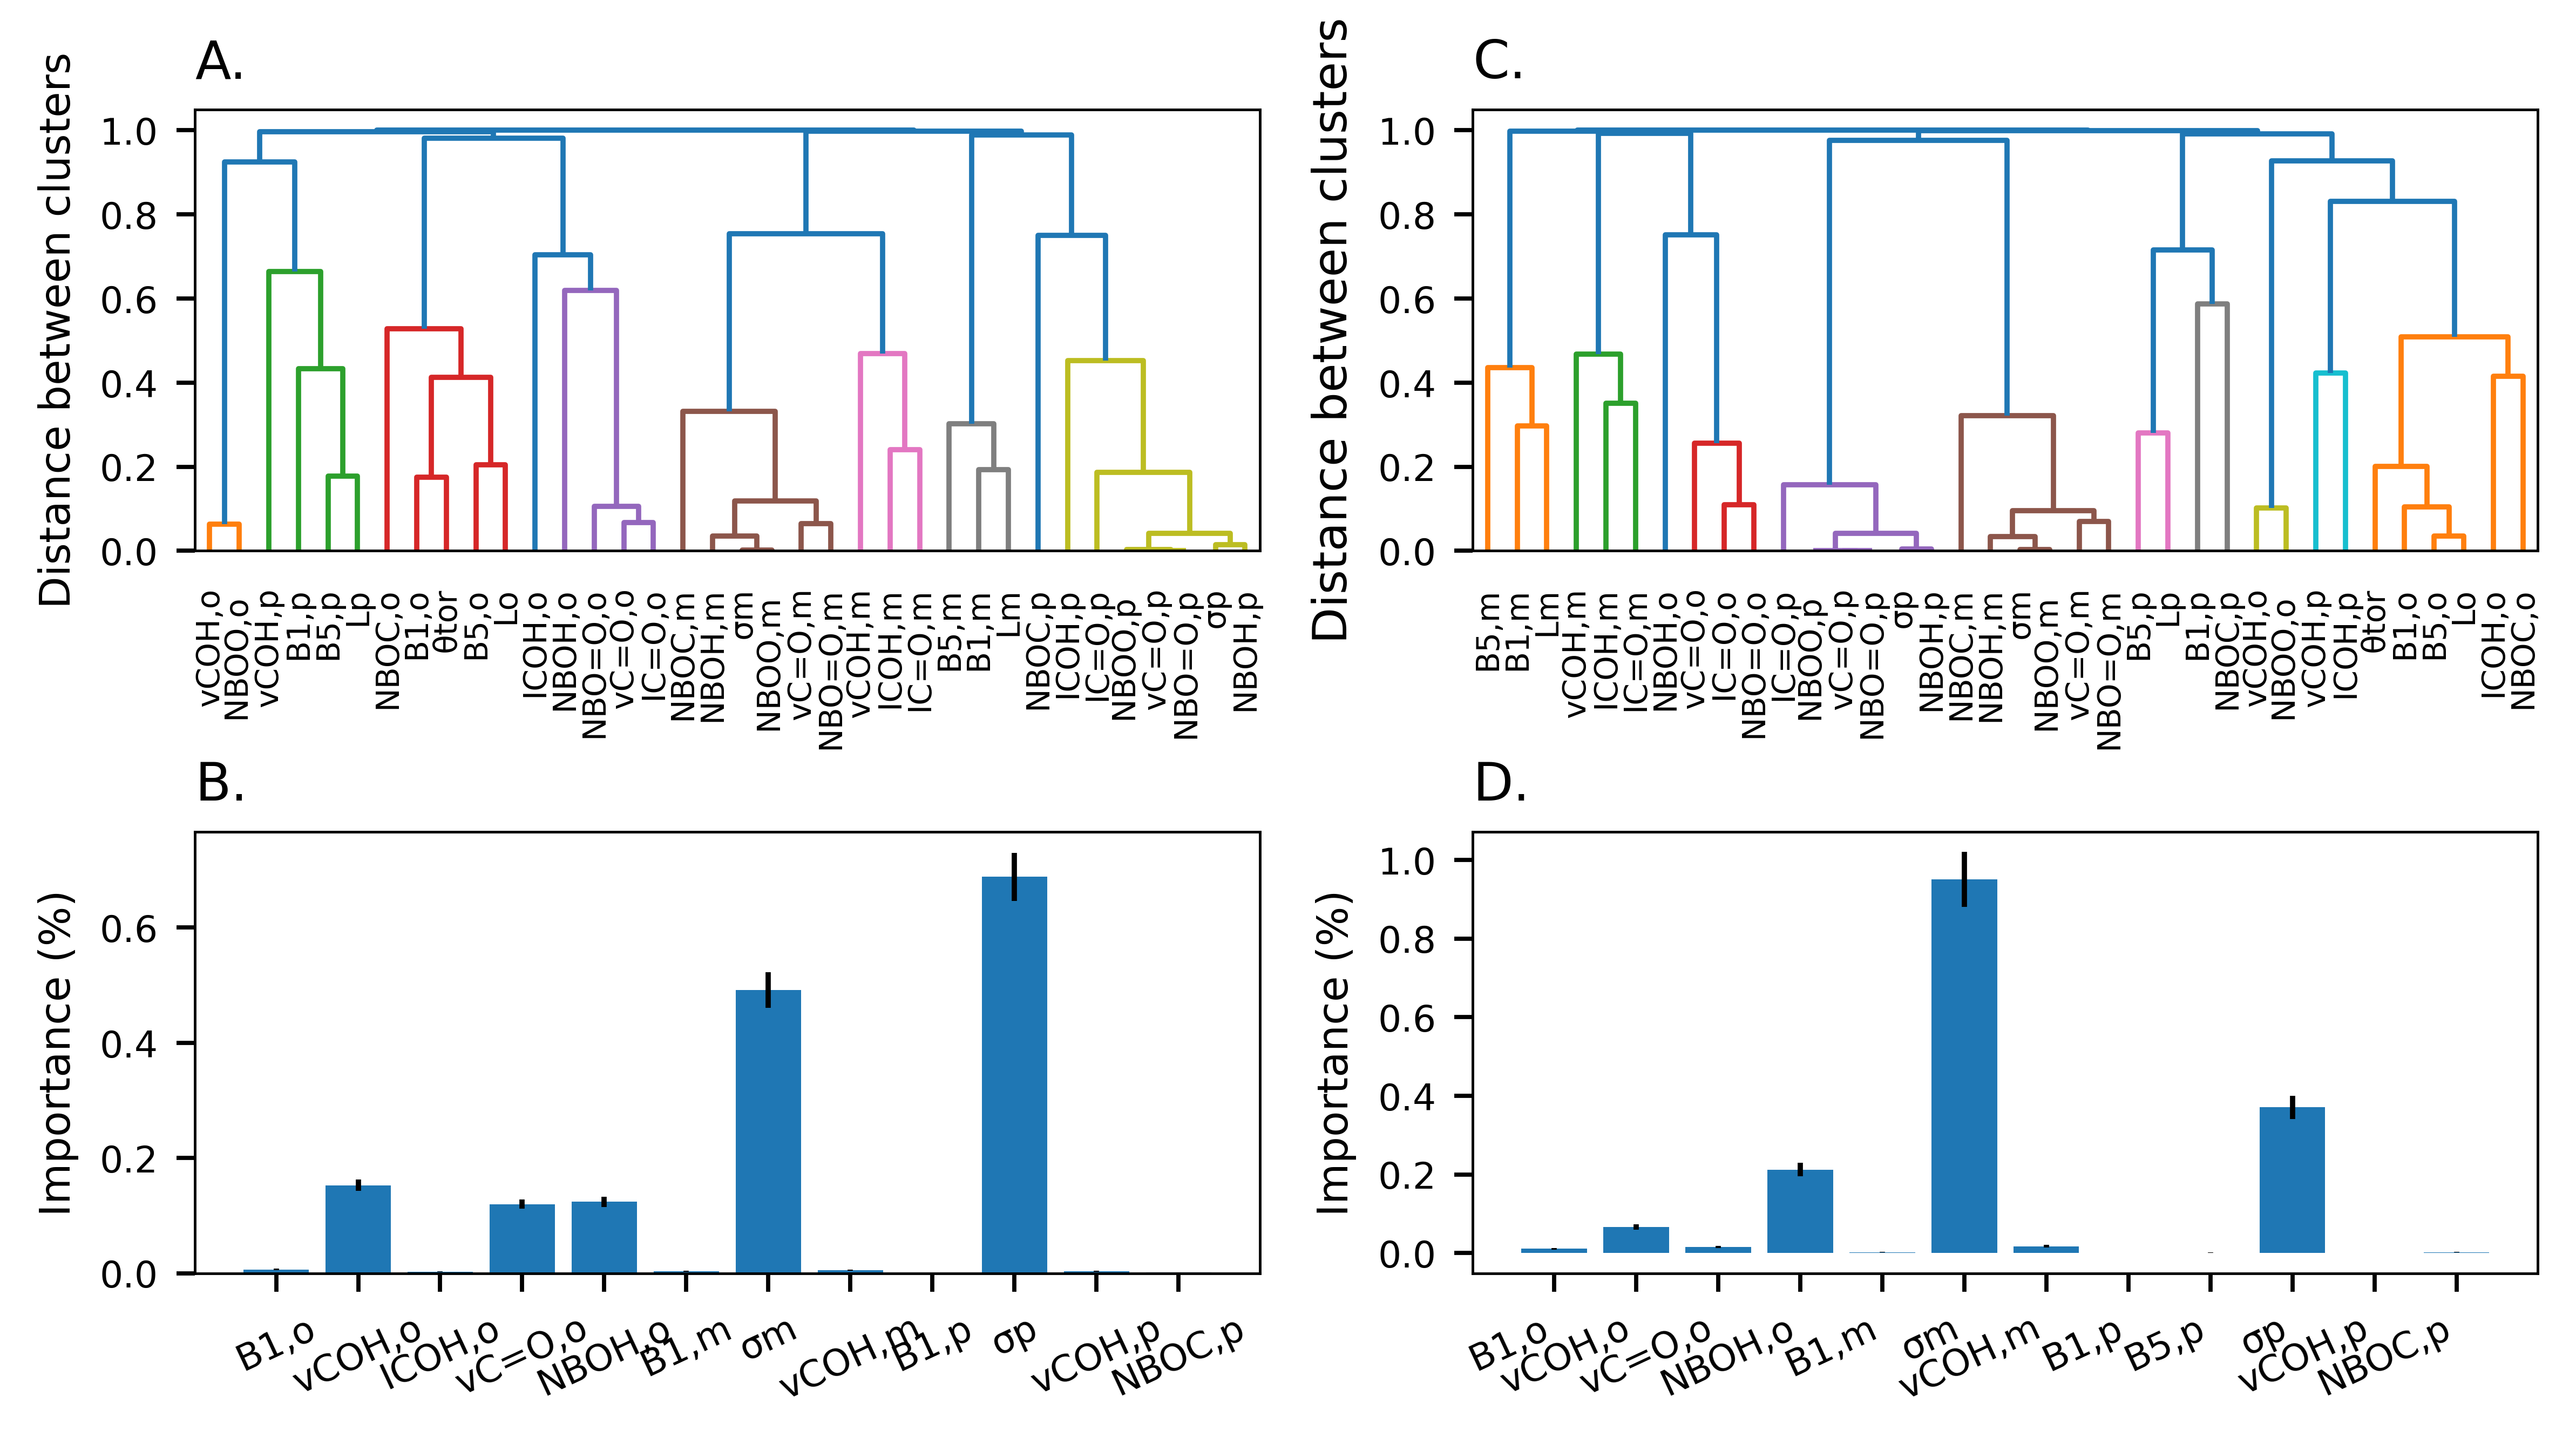

In [90]:
fig = plt.figure(figsize=(8, 4))

ax1 = plt.subplot2grid((5, 2), (0, 0), rowspan =2)

ax2 = plt.subplot2grid((5, 2), (3, 0), rowspan =2)
ax3 = plt.subplot2grid((5, 2), (0, 1), rowspan =2)
ax4 = plt.subplot2grid((5, 2), (3, 1), rowspan =2)

##ONO

ax1.set_ylabel("Distance between clusters", size = 8)
dendrogra1 = hierarchy.dendrogram(Z_ONO, labels=df_X_ONO.columns, orientation='top', 
           leaf_rotation=90, ax = ax1, leaf_font_size = 6);
ax1.set_title('A.', loc='left', fontsize =10)


ax2.bar(feature_names_ONO, mean_importances_ONO, yerr = std_ONO)

plt.xticks(rotation=25, rotation_mode='default', ha = 'right', fontsize = 7)
ax2.set_title('B.', loc='left', fontsize =10)
ax2.set_ylabel('Importance (%)', size = 8)
ax2.tick_params(axis = 'x',rotation=25)



## triarylboranes

ax3.set_ylabel("Distance between clusters", size = 9)
dendrogram3 = hierarchy.dendrogram(Z_triarylboranes, labels=df_X_triarylboranes.columns, orientation='top', 
           leaf_rotation=90, ax = ax3, leaf_font_size = 6);

ax3.set_title('C.', loc='left', fontsize =10)

ax4.bar(feature_names_triarylboranes, mean_importances_triarylboranes, yerr = std_triarylboranes)
ax4.tick_params(axis = 'x',rotation=25)
#plt.xticks(rotation=25, rotation_mode='default', ha = 'right', fontsize = 7)
ax4.set_title('D.', loc='left', fontsize =10)
ax4.set_ylabel('Importance (%)', size = 8)

fig.savefig(f'../results/interpretability/hammett_descriptors/hierarchical_clustering_perm_importance.png', facecolor = 'white', format = 'png', transparent = True, bbox_inches='tight')